### Subject: Forecasting Homework: ALTO_Data_Processing
### Team: Blue team
### Date: 03/03/2023

In [1]:
!python --version

import pandas as pd
print('Pandas:', pd.__version__)

import matplotlib.pyplot as plt 
from matplotlib import __version__ as v_plt
print('matplotlib', v_plt)
import plotly.express as px

# from functools import reduce
# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tools.eval_measures import rmse, meanabs, rmspe
# from sklearn.metrics import mean_absolute_percentage_error

import numpy as np
print('Numpy:', np.__version__)

import tensorflow as tf #Use pip. Ensure you have 2.11.0
!pip show tensorflow
# print('TensorFlow:', tf.VERSION)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.vector_ar.var_model import VAR
# from statsmodels.tsa.statespace.varmax import VARMAX

from statsmodels import __version__ as v_stm
from pyod.models.knn import KNN

print('statsmodels:', v_stm)

# PyOD library
import pyod

print('Success.')

Python 3.9.13
Pandas: 1.4.4
matplotlib 3.5.2
Numpy: 1.21.5


Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\lxf12\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 
statsmodels: 0.13.2
Success.


In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# load the py file with functions we created
import TSModels
from TSModels import Created_Functions

## Import Data

Date    Orders
0  2018-01-01  1.266171
1  2018-02-01 -0.617705
2  2018-03-01  0.882906
3  2018-04-01  0.693607
4  2018-05-01  1.323791

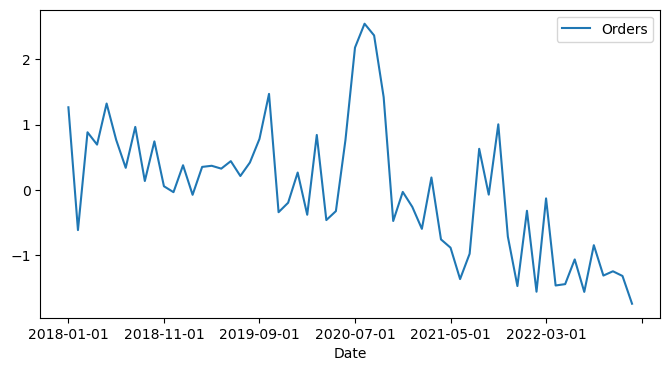

In [4]:
AltoSales = pd.read_csv('Scaled_sales_Mansfield_WH_SW_Alto_2022.csv')
AltoSales.plot.line('Date', 'Orders', figsize = (8,4))
AltoSales.head(5)

# results are showing the data has potential outliers around 30th 

In [5]:
## Convert Date into a number 
AltoSales.shape[0]                  # checking the number of "date" columns 
for d in range(AltoSales.shape[0]):
    AltoSales['Date'][d] = d
AltoSales = AltoSales.astype({'Date': 'int64'})

C:\Users\lxf12\AppData\Local\Temp\ipykernel_15024\2075988115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AltoSales['Date'][d] = d


In [6]:
AltoSales.head()

Date    Orders
0     0  1.266171
1     1 -0.617705
2     2  0.882906
3     3  0.693607
4     4  1.323791

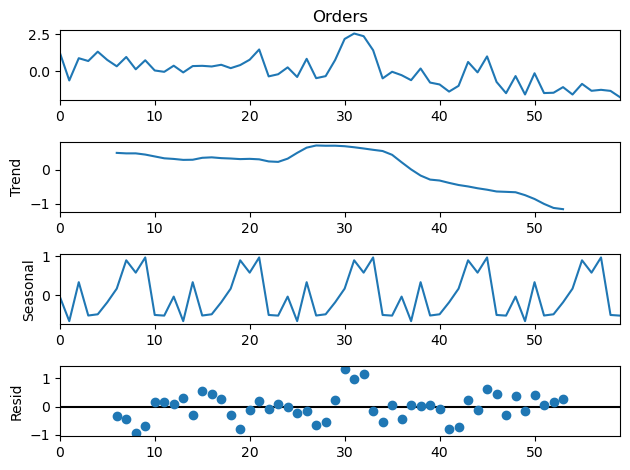

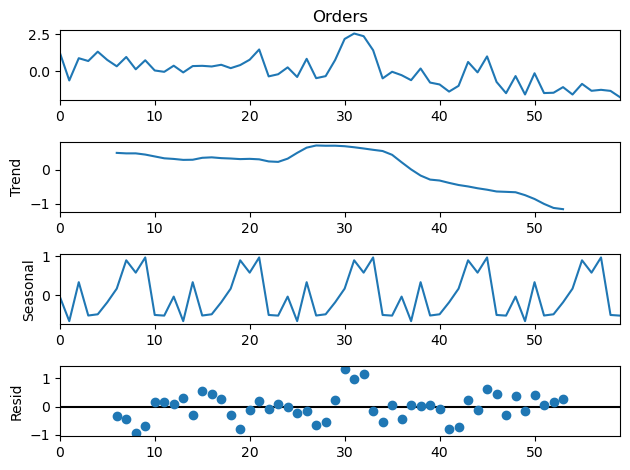

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposition
ts_decomposition=seasonal_decompose(AltoSales['Orders'], period=12)
# ts_decomposition
ts_decomposition.plot()

# results are showing the data is seasonal and tend to decline and not stationary

<Figure size 2000x1000 with 0 Axes>

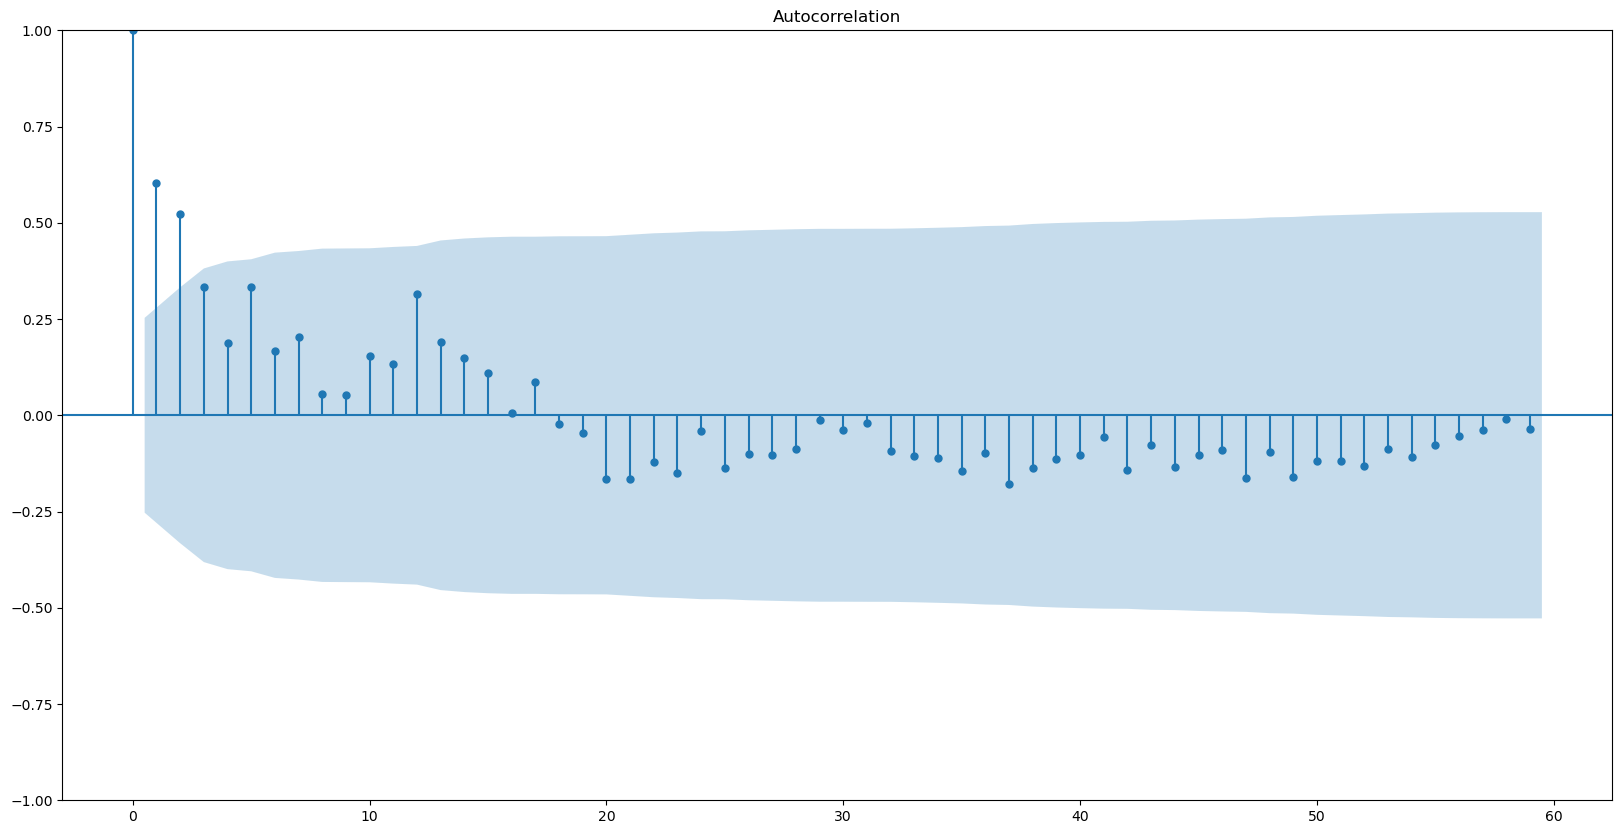

In [8]:
# ACF Chart
data_a = AltoSales.to_numpy().T[1]
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(data_a, lags=59)
plt.show()

# results are showing the MA parameter 'q' should be 1

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\lxf12\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

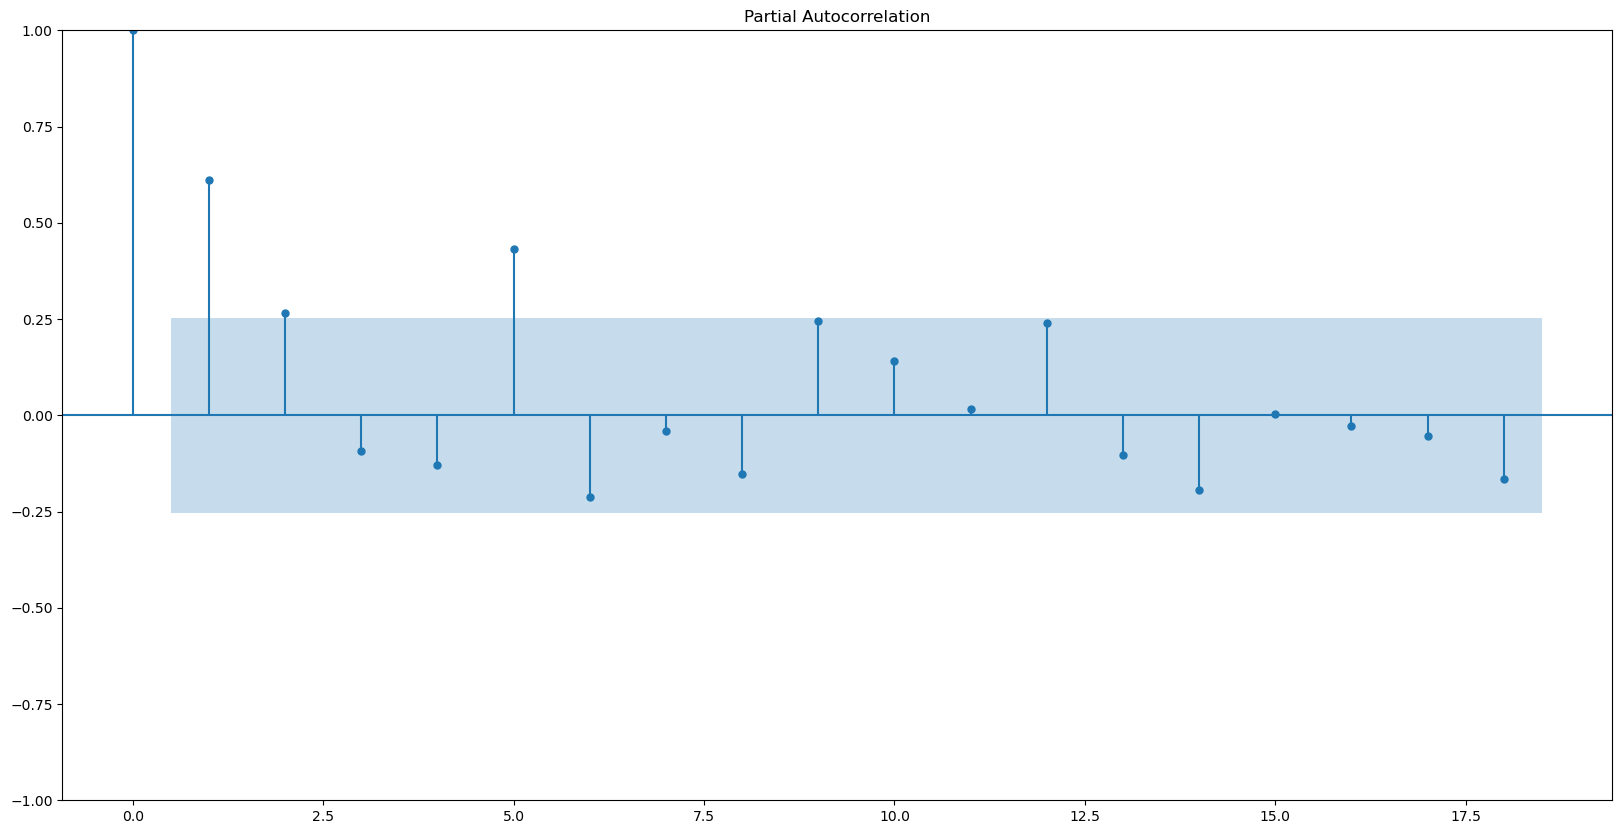

In [10]:
# PACF Chart 
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_pacf(data_a)
plt.show()

# results are showing the AR parameter 'p' should be 1

In [11]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(data_a)

# Print the test statistics and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# the result is greater than 0.05, so it shows that the data is not stationary, so the data is seasonal 

ADF Statistic: -0.520165
p-value: 0.888021


### Outliers detecting and replacing 
4 methods used: PCA, LOF, KNN, HBOS

In [12]:
# transform the data to array form 
data_a = AltoSales.to_numpy().T[1]
data_a

array([ 1.26617135, -0.61770515,  0.88290647,  0.69360659,  1.32379074,
        0.76677337,  0.33740581,  0.9653497 ,  0.13511065,  0.74325067,
        0.05499907, -0.03608976,  0.37710315, -0.07645918,  0.35160903,
        0.36890381,  0.32494998,  0.43996475,  0.21199625,  0.41917517,
        0.78079737,  1.47173728, -0.34327373, -0.19814991,  0.26509033,
       -0.38279185,  0.84177715, -0.46411316, -0.32696466,  0.76327857,
        2.18221223,  2.54813572,  2.36869118,  1.42182437, -0.478406  ,
       -0.0321469 , -0.26222125, -0.59870777,  0.18910083, -0.7604991 ,
       -0.88761125, -1.3693112 , -0.98044748,  0.62926642, -0.07421892,
        1.00486783, -0.71721734, -1.47603702, -0.32163285, -1.56313819,
       -0.13152468, -1.46761366, -1.44673447, -1.06781748, -1.5657817 ,
       -0.84930286, -1.31536582, -1.2496367 , -1.32159374, -1.74733208])

In [13]:
## PCA

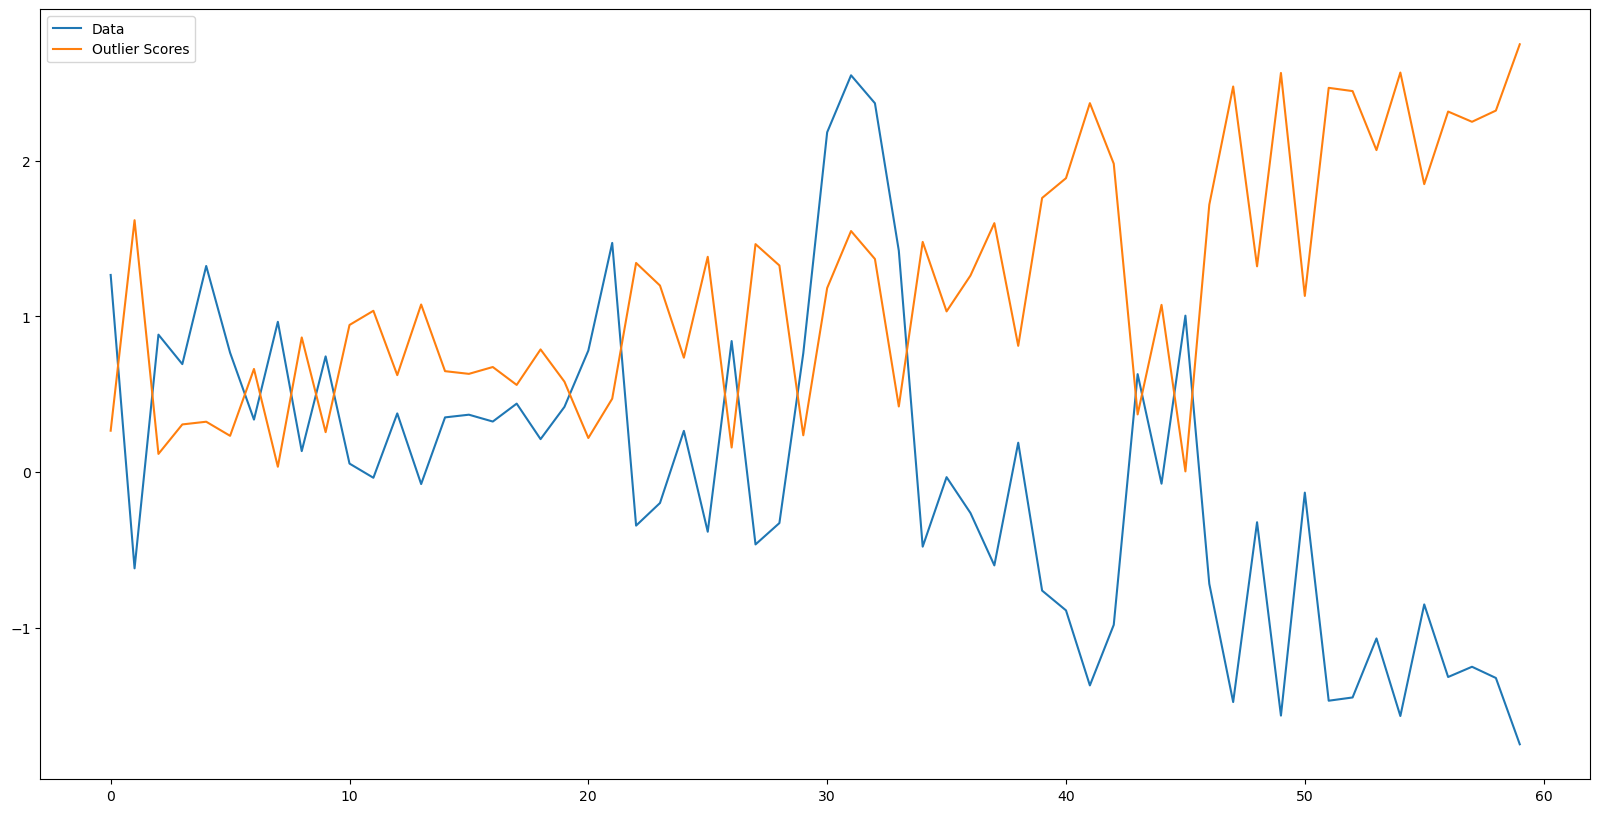

In [14]:
from pyod.models.pca import PCA

# Fit the PCA model to the data
pca_model = PCA(contamination=0.1)
pca_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = pca_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [15]:
# LOF

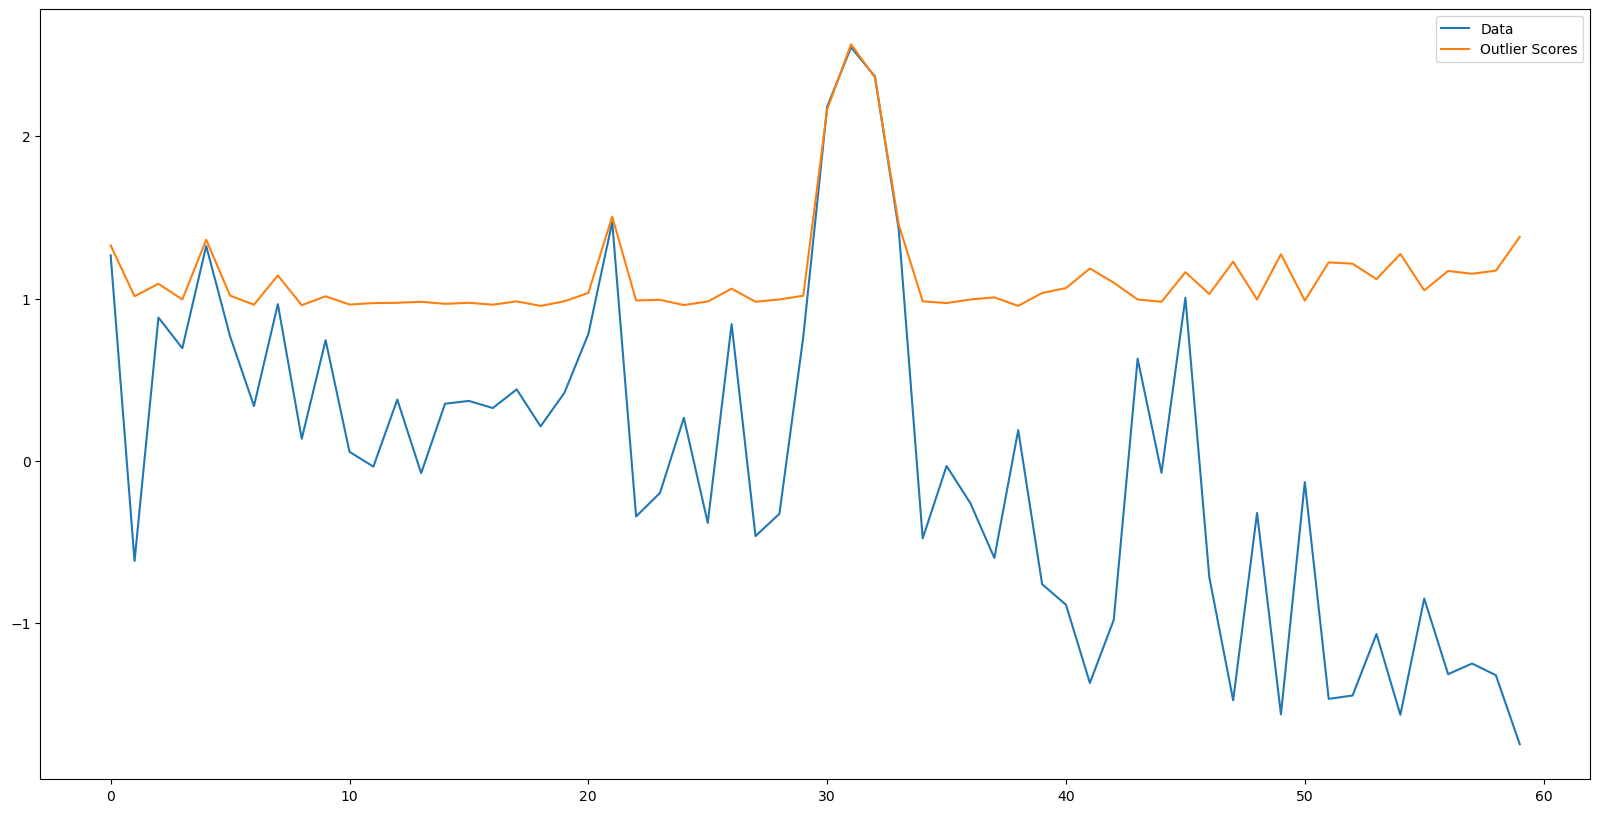

In [16]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [17]:
# KNN

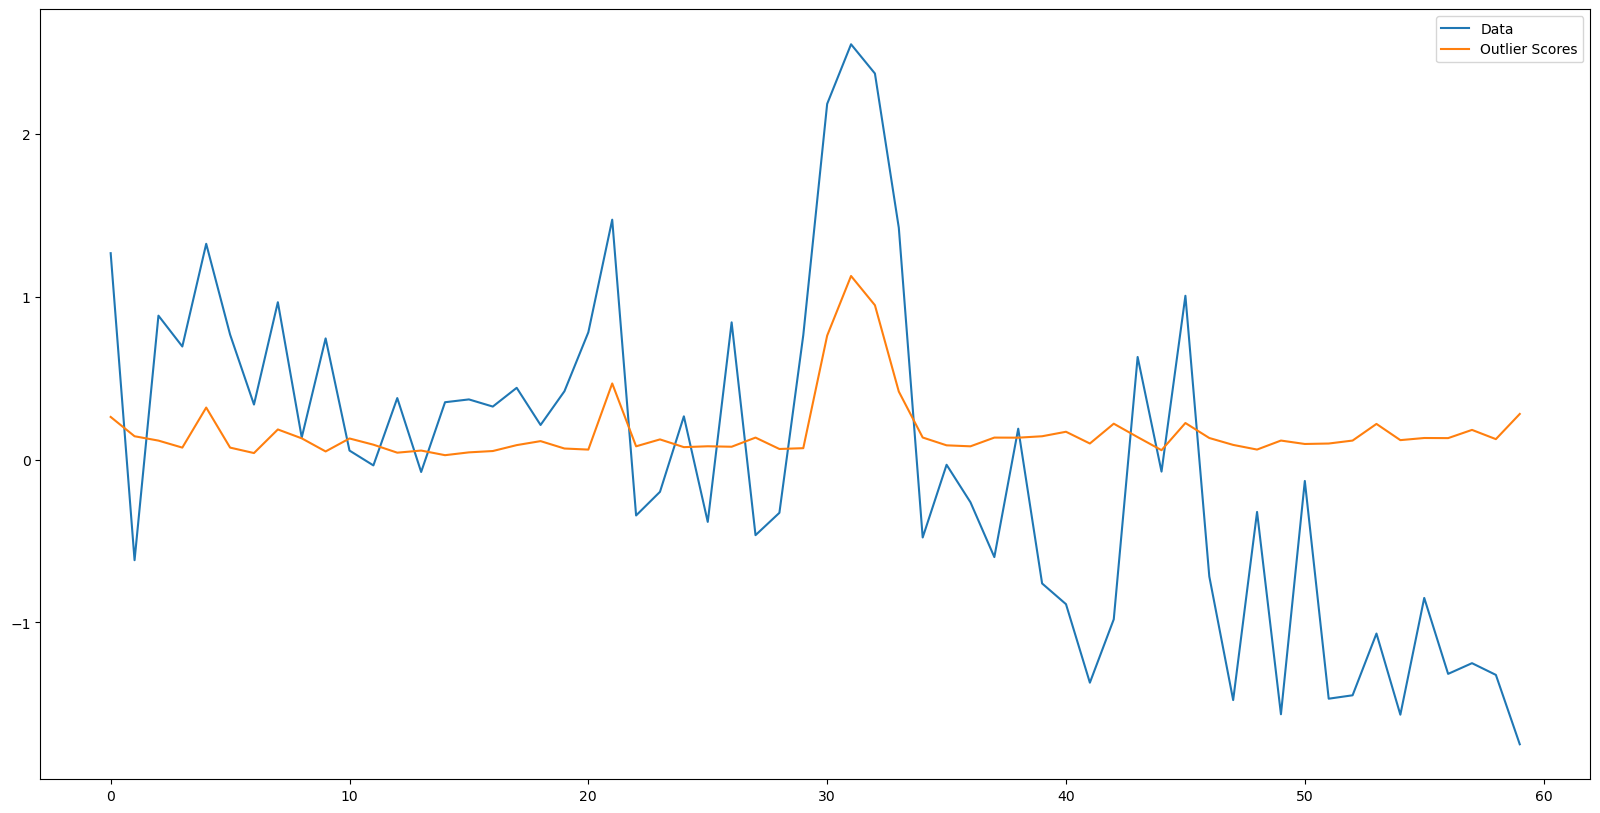

In [18]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [19]:
# HBOS

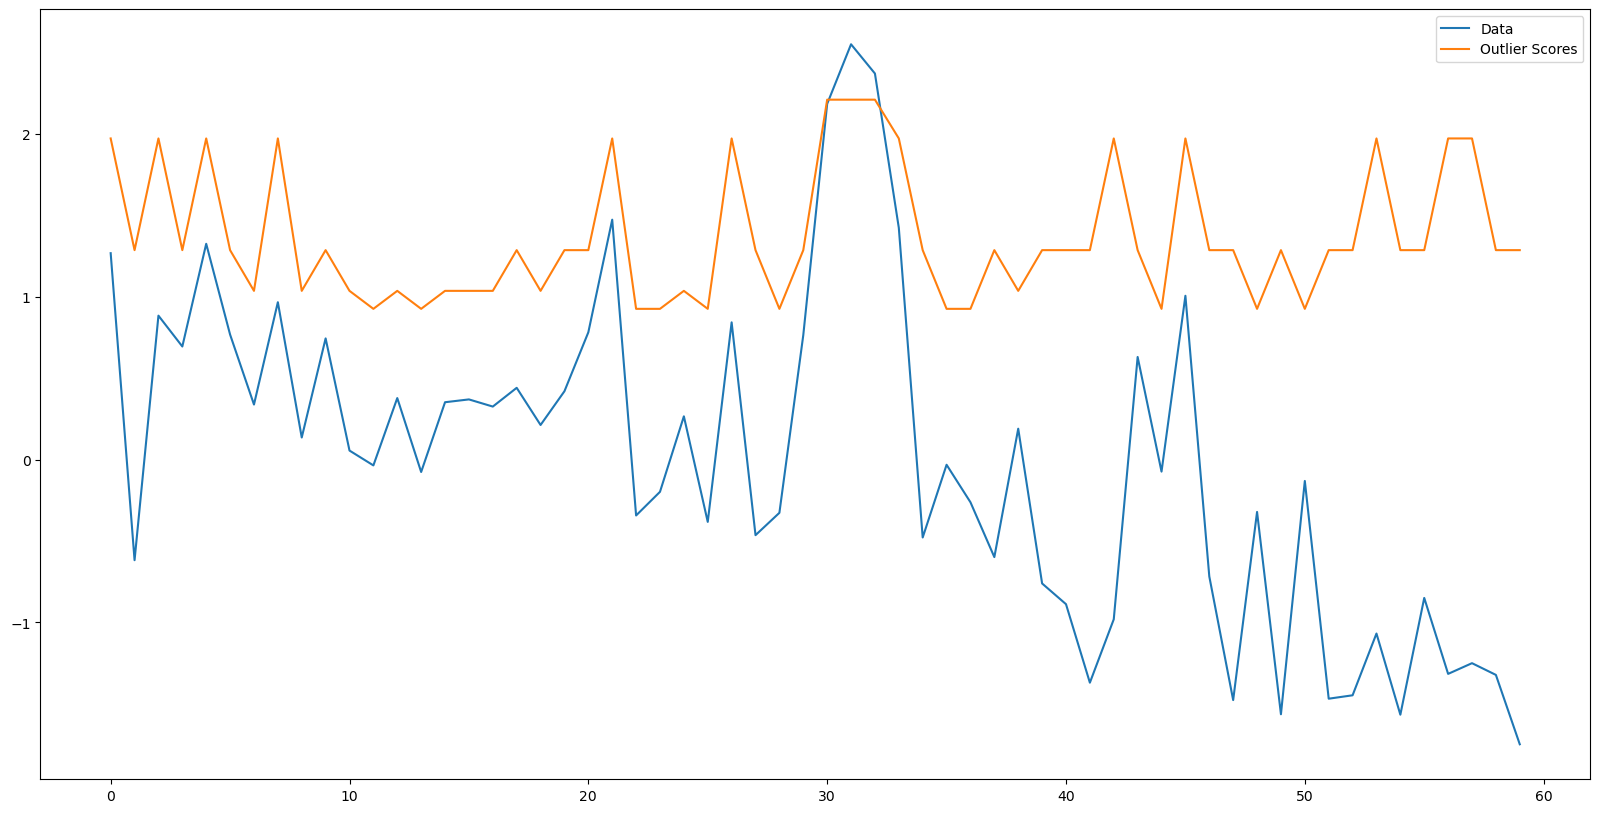

In [20]:
# import numpy as np
from pyod.models.hbos import HBOS
# import matplotlib.pyplot as plt

# Generate some sample time series data
data = np.random.randn(100)

# Fit the HBOS model to the data
hbos_model = HBOS(contamination=0.1)
hbos_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = hbos_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

# In general, higher outlier scores in HBOS indicate a higher degree of anomaly for a given data point, 
# meaning that the data point is less likely to have been generated by the underlying distribution of the data.

#### repalce the outliers with moving average method

Month    Orders
0  1/1/2018  1.266171
1  2/1/2018 -0.617705
2  3/1/2018  0.882906
3  4/1/2018  0.693607
4  5/1/2018  1.323791

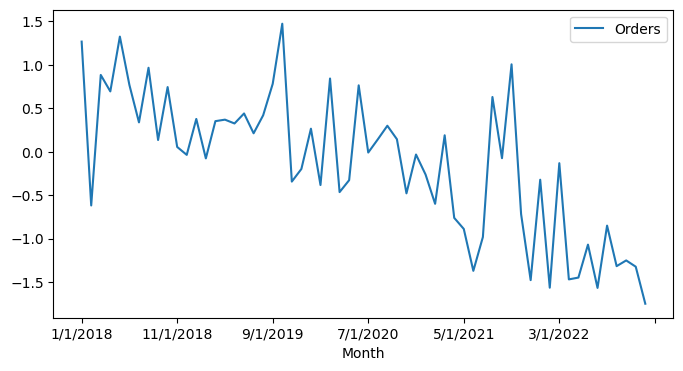

In [21]:
# replace the data 
AltoSales = pd.read_csv('Scaled_sales_Mansfield_WH_SW_Alto_2022_clean.csv').rename(columns={'Date':'Month'})
AltoSales.plot.line('Month', 'Orders', figsize = (8,4))
AltoSales.head(5)

## Making the Data Stationary

In [22]:
# Calculate the first difference
diff_data = np.diff(data_a)     # Using the diference of 1 as default 
diff_data

array([-1.88387649,  1.50061162, -0.18929988,  0.63018415, -0.55701738,
       -0.42936756,  0.6279439 , -0.83023906,  0.60814003, -0.6882516 ,
       -0.09108883,  0.41319291, -0.45356233,  0.42806821,  0.01729478,
       -0.04395383,  0.11501477, -0.2279685 ,  0.20717892,  0.3616222 ,
        0.69093991, -1.81501101,  0.14512382,  0.46324024, -0.64788218,
        1.22456901, -1.30589032,  0.1371485 ,  1.09024323,  1.41893366,
        0.3659235 , -0.17944455, -0.94686681, -1.90023036,  0.44625909,
       -0.23007434, -0.33648653,  0.7878086 , -0.94959992, -0.12711215,
       -0.48169995,  0.38886372,  1.6097139 , -0.70348534,  1.07908675,
       -1.72208517, -0.75881968,  1.15440417, -1.24150534,  1.43161351,
       -1.33608897,  0.02087919,  0.37891698, -0.49796421,  0.71647883,
       -0.46606296,  0.06572913, -0.07195704, -0.42573834])

In [23]:
# Perform the ADF test
result = adfuller(diff_data)

# Print the test statistics and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# the result is lower than 0.05, so it shows that the data is stationary

ADF Statistic: -4.376635
p-value: 0.000326


<Figure size 2000x1000 with 0 Axes>

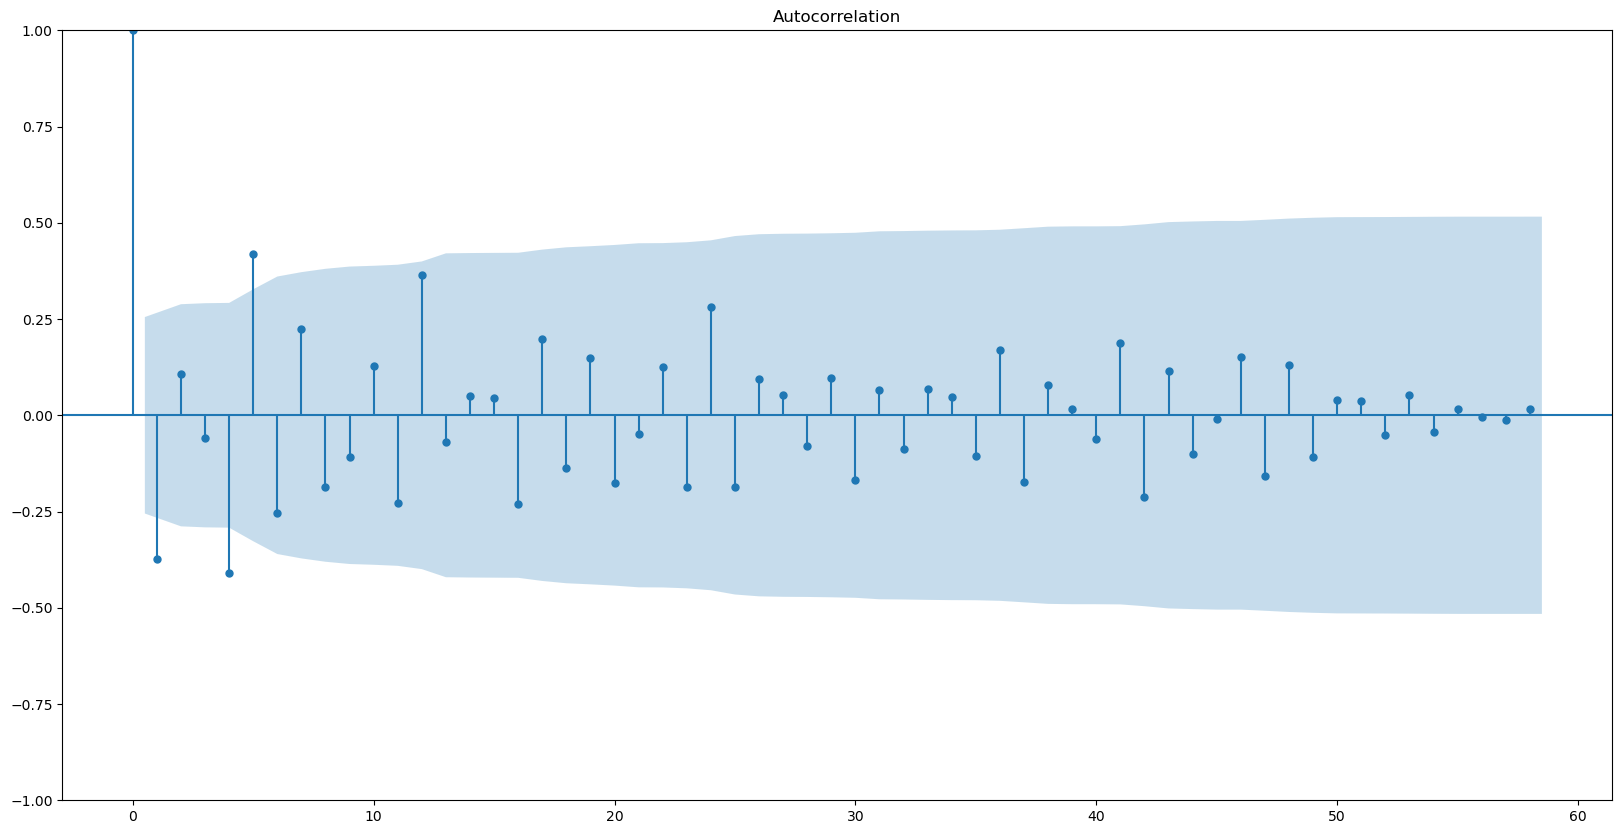

In [24]:
# ACF
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(diff_data, lags=58)
plt.show()

C:\Users\lxf12\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

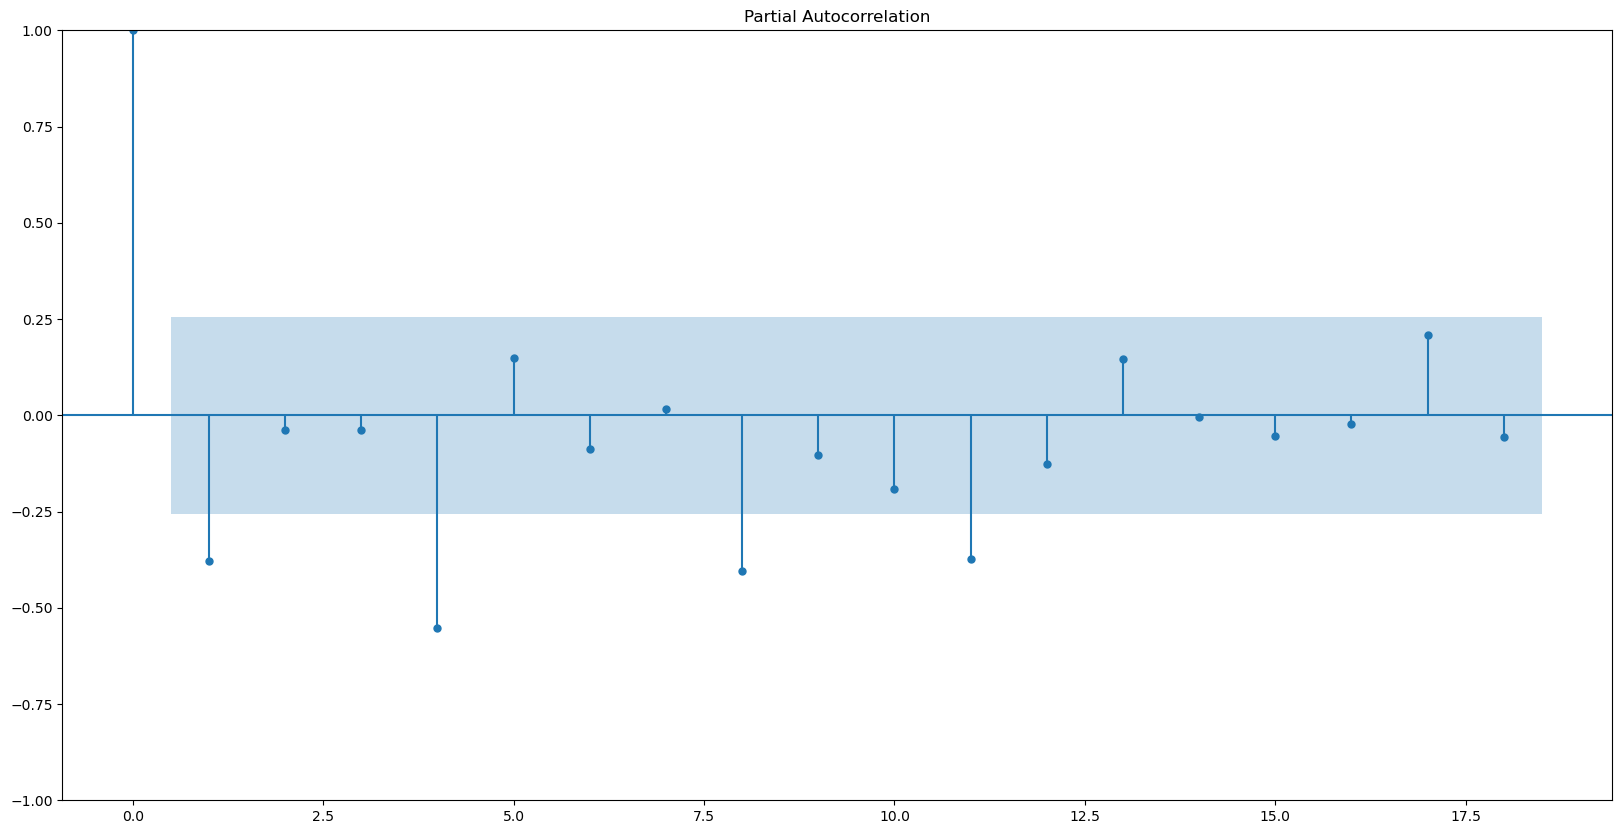

In [25]:
# PACF
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_pacf(diff_data)
plt.show()

In [26]:
## Putting the differenced data in a data frame 
stationary_data = pd.DataFrame(diff_data).reset_index()
stationary_data.columns = ['Date', 'Orders']
# stationary_data['Month'] = AltoSales['Month']
stationary_data.tail()

Date    Orders
54    54  0.716479
55    55 -0.466063
56    56  0.065729
57    57 -0.071957
58    58 -0.425738

<AxesSubplot:xlabel='Date'>

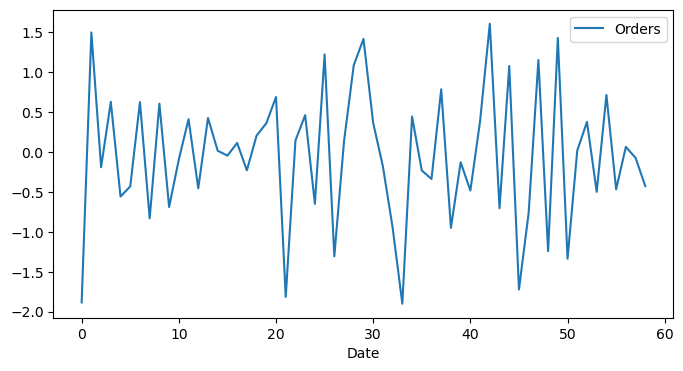

In [27]:
stationary_data.plot.line('Date', 'Orders', figsize = (8,4))

#### This part will be detecting the outliers and replacing them: 
No obvious outliers after stationary transforming 

In [28]:
# transform the data to array form 
data_a = stationary_data.to_numpy().T[1]
data_a

array([-1.88387649,  1.50061162, -0.18929988,  0.63018415, -0.55701738,
       -0.42936756,  0.6279439 , -0.83023906,  0.60814003, -0.6882516 ,
       -0.09108883,  0.41319291, -0.45356233,  0.42806821,  0.01729478,
       -0.04395383,  0.11501477, -0.2279685 ,  0.20717892,  0.3616222 ,
        0.69093991, -1.81501101,  0.14512382,  0.46324024, -0.64788218,
        1.22456901, -1.30589032,  0.1371485 ,  1.09024323,  1.41893366,
        0.3659235 , -0.17944455, -0.94686681, -1.90023036,  0.44625909,
       -0.23007434, -0.33648653,  0.7878086 , -0.94959992, -0.12711215,
       -0.48169995,  0.38886372,  1.6097139 , -0.70348534,  1.07908675,
       -1.72208517, -0.75881968,  1.15440417, -1.24150534,  1.43161351,
       -1.33608897,  0.02087919,  0.37891698, -0.49796421,  0.71647883,
       -0.46606296,  0.06572913, -0.07195704, -0.42573834])

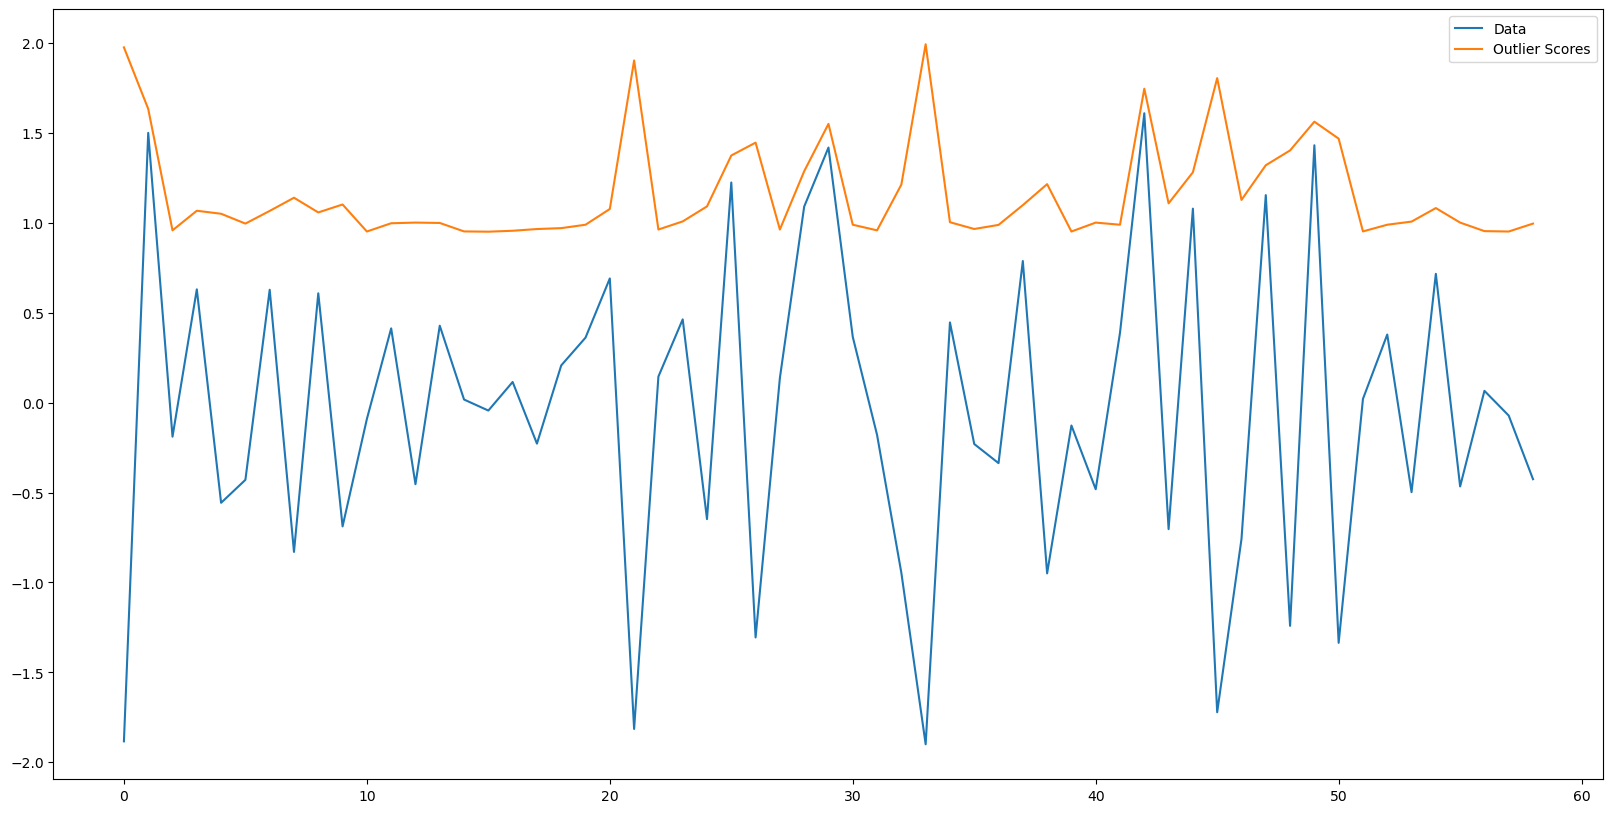

In [29]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

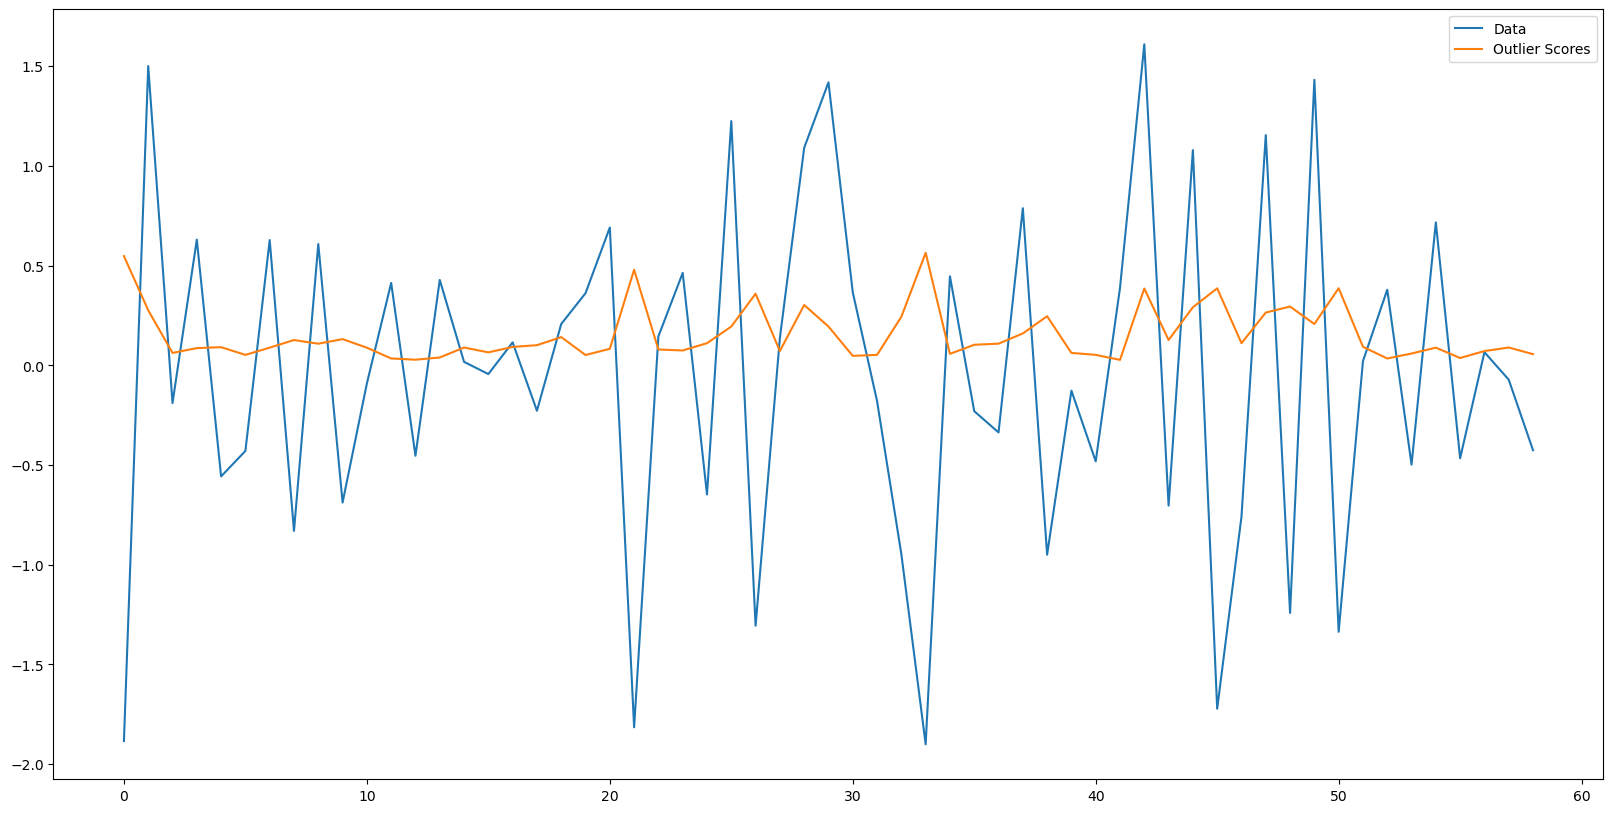

In [30]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

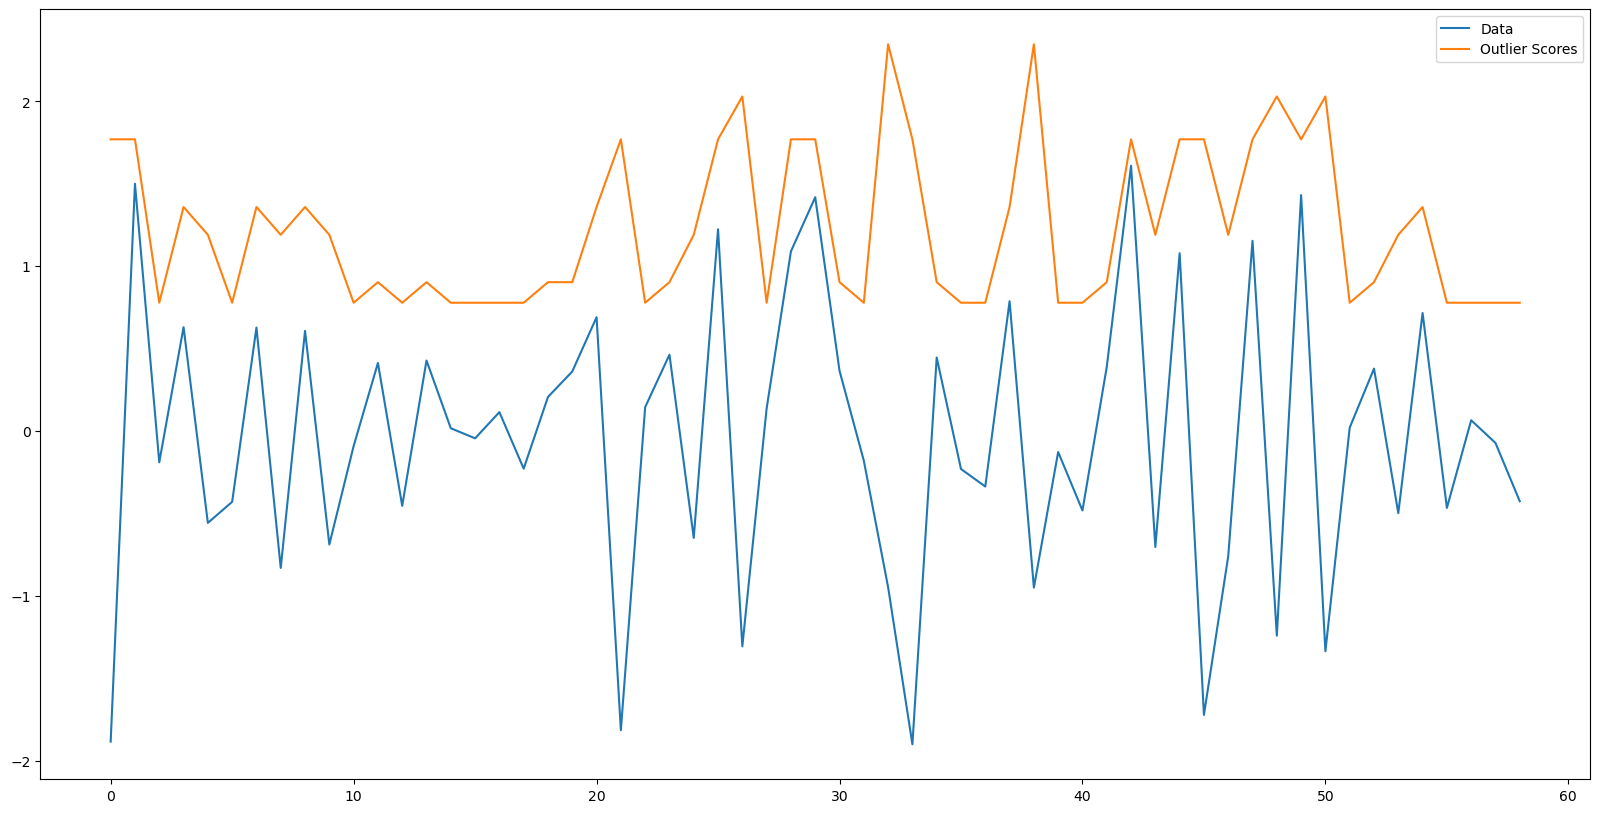

In [31]:
# import numpy as np
from pyod.models.hbos import HBOS
# import matplotlib.pyplot as plt

# Generate some sample time series data
data = np.random.randn(100)

# Fit the HBOS model to the data
hbos_model = HBOS(contamination=0.1)
hbos_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = hbos_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

# In general, higher outlier scores in HBOS indicate a higher degree of anomaly for a given data point, 
# meaning that the data point is less likely to have been generated by the underlying distribution of the data.

In [32]:
# stationary_data.to_csv('stationary_sales_data.csv', index=False)

## Import Macro Varibales 

In [33]:
macro_var = pd.read_csv('macro_variables.csv').rename(columns={'Date':'Month'})
#macro_var.head()

# another data removed the Jan 2018 data 
macro_var_59 = pd.read_csv('macro_variables_59.csv').rename(columns={'Date':'Month'})

In [34]:
macro_var_59.tail()

Month   CPI  FED FUNDS RATE  RETAIL SALES  U RATE  R GDP  \
54   8/1/2022 -0.04            2.33           0.6     3.7    0.8   
55   9/1/2022  0.22            2.56          -2.1     3.5    0.8   
56  10/1/2022  0.41            3.08           2.0     3.7    0.7   
57  11/1/2022 -0.10            3.78          -1.1     3.6    0.7   
58  12/1/2022 -0.31            4.10          -1.6     3.5    0.7   

    H Total Sales      TCS      PPI  
54          15.91  1.06269 -1.10520  
55         -13.73  0.81667  0.54100  
56           2.27  0.50525  0.04681  
57          -4.44  0.81919  1.76687  
58           9.30  0.74659 -0.69331

In [35]:
stationary_data

Date    Orders
0      0 -1.883876
1      1  1.500612
2      2 -0.189300
3      3  0.630184
4      4 -0.557017
5      5 -0.429368
6      6  0.627944
7      7 -0.830239
8      8  0.608140
9      9 -0.688252
10    10 -0.091089
11    11  0.413193
12    12 -0.453562
13    13  0.428068
14    14  0.017295
15    15 -0.043954
16    16  0.115015
17    17 -0.227969
18    18  0.207179
19    19  0.361622
20    20  0.690940
21    21 -1.815011
22    22  0.145124
23    23  0.463240
24    24 -0.647882
25    25  1.224569
26    26 -1.305890
27    27  0.137149
28    28  1.090243
29    29  1.418934
30    30  0.365923
31    31 -0.179445
32    32 -0.946867
33    33 -1.900230
34    34  0.446259
35    35 -0.230074
36    36 -0.336487
37    37  0.787809
38    38 -0.949600
39    39 -0.127112
40    40 -0.481700
41    41  0.388864
42    42  1.609714
43    43 -0.703485
44    44  1.079087
45    45 -1.722085
46    46 -0.758820
47    47  1.154404
48    48 -1.241505
49    49  1.431614
50    50 -1.336089
51    51  0.020879
52    52  0.378917
53    53 -0.497964
54    54  0.716479
55    55 -0.466063
56    56  0.065729
57    57 -0.071957
58    58 -0.425738

### Stationary Data Combined with the macro variables 

In [36]:
# combine the data with sales data
# combined_data = stationary_data.join(macro_var_59, how='inner', on='Month')
combined_data = pd.concat([stationary_data, macro_var_59], axis=1)
# combined_data.index = pd.to_datetime(combined_data['Month'])
# combined_data.drop("Month", axis = 1, inplace = True)
#new_data.drop("Month", axis = 1, inplace = True)
combined_data.head()

Date    Orders     Month   CPI  FED FUNDS RATE  RETAIL SALES  U RATE  \
0     0 -1.883876  2/1/2018  0.45            1.42          -0.1     4.1   
1     1  1.500612  3/1/2018  0.23            1.51           0.1     4.0   
2     2 -0.189300  4/1/2018  0.40            1.69           1.4     4.0   
3     3  0.630184  5/1/2018  0.42            1.70          -0.8     3.8   
4     4 -0.557017  6/1/2018  0.16            1.82           0.3     4.0   

   R GDP  H Total Sales      TCS      PPI  
0    0.7          12.50  0.18094  1.53298  
1    0.7          22.22  1.68573 -0.76576  
2    0.7          -7.58  0.05921  0.86913  
3    0.7           1.64  0.47337  0.58506  
4    0.7          -9.68 -0.29446 -1.36472

In [37]:
combined_data.tail() 

Date    Orders      Month   CPI  FED FUNDS RATE  RETAIL SALES  U RATE  \
54    54  0.716479   8/1/2022 -0.04            2.33           0.6     3.7   
55    55 -0.466063   9/1/2022  0.22            2.56          -2.1     3.5   
56    56  0.065729  10/1/2022  0.41            3.08           2.0     3.7   
57    57 -0.071957  11/1/2022 -0.10            3.78          -1.1     3.6   
58    58 -0.425738  12/1/2022 -0.31            4.10          -1.6     3.5   

    R GDP  H Total Sales      TCS      PPI  
54    0.8          15.91  1.06269 -1.10520  
55    0.8         -13.73  0.81667  0.54100  
56    0.7           2.27  0.50525  0.04681  
57    0.7          -4.44  0.81919  1.76687  
58    0.7           9.30  0.74659 -0.69331

In [39]:
fig = px.line(combined_data, x=combined_data.Month, y=combined_data.columns[1:11])
fig.update_layout(title_text="Line Charts of All Variables", title_x = 0.5)
# fig.add_vline(x=59, line_width=3, line_dash="dash", line_color="grey")
# Show plot 
fig.show()

# the chart shows that <'RETAIL SALES', 'U RATE', 'R GDP'> have potential outliers to replace 

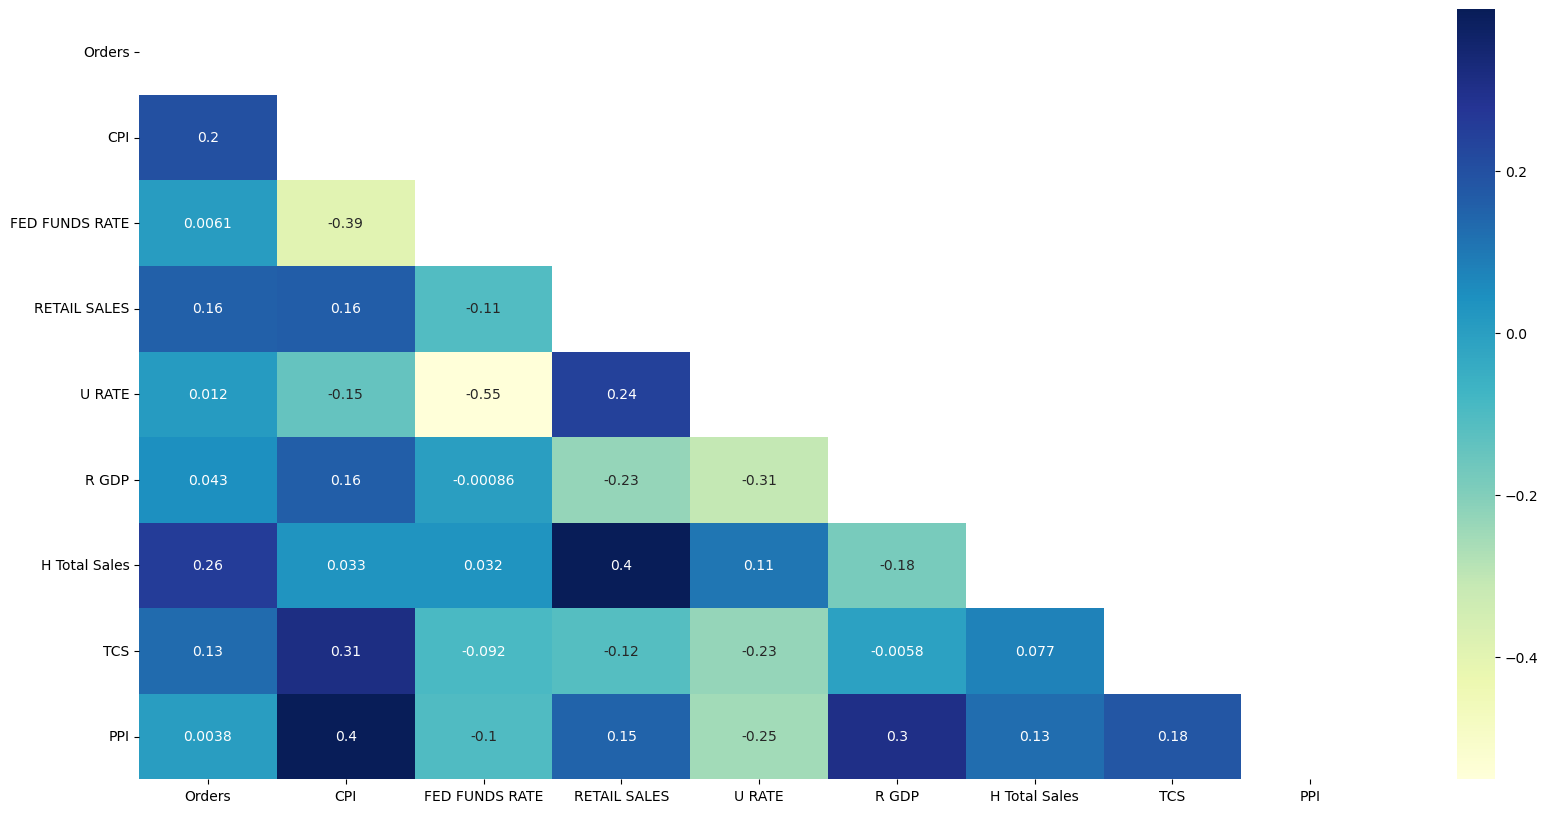

In [40]:
import matplotlib.pyplot as mp
import seaborn as sb
# new_data.iloc[:,0:9].corr().where(np.triu(np.ones(new_data.corr().shape), k=1).astype(bool))
# creating mask
mask = np.triu(np.ones_like(combined_data.iloc[:,1:11].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(combined_data.iloc[:,1:11].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
# mp.show()

In [38]:
combined_data.to_csv('stationary_data.csv', index=False)

### Standardize Data

In [41]:
# combined_data_60 = pd.concat([AltoSales, macro_var], axis=1)
combined_data_60 = AltoSales.merge(macro_var, how='inner', on='Month')
combined_data_60

Month    Orders   CPI  FED FUNDS RATE  RETAIL SALES  U RATE  R GDP  \
0    1/1/2018  1.266171  0.54            1.41          -0.9     4.0    0.7   
1    2/1/2018 -0.617705  0.45            1.42          -0.1     4.1    0.7   
2    3/1/2018  0.882906  0.23            1.51           0.1     4.0    0.7   
3    4/1/2018  0.693607  0.40            1.69           1.4     4.0    0.7   
4    5/1/2018  1.323791  0.42            1.70          -0.8     3.8    0.7   
5    6/1/2018  0.766773  0.16            1.82           0.3     4.0    0.7   
6    7/1/2018  0.337406  0.01            1.91           0.5     3.8    0.7   
7    8/1/2018  0.965350  0.06            1.91          -1.2     3.8    0.7   
8    9/1/2018  0.135111  0.12            1.95          -0.1     3.7    0.7   
9   10/1/2018  0.743251  0.18            2.19           0.5     3.8    0.2   
10  11/1/2018  0.054999 -0.33            2.20           0.0     3.8    0.2   
11  12/1/2018 -0.036090 -0.32            2.27           0.2     3.9    0.2   
12   1/1/2019  0.377103  0.19            2.40          -1.1     4.0    0.5   
13   2/1/2019 -0.076459  0.42            2.40           0.1     3.8    0.5   
14   3/1/2019  0.351609  0.56            2.41           0.7     3.8    0.5   
15   4/1/2019  0.368904  0.53            2.42           0.7     3.6    0.7   
16   5/1/2019  0.324950  0.21            2.39           0.5     3.7    0.7   
17   6/1/2019  0.439965  0.02            2.38           0.6     3.6    0.7   
18   7/1/2019  0.211996  0.17            2.40           0.2     3.7    0.9   
19   8/1/2019  0.419175 -0.01            2.13           0.0     3.7    0.9   
20   9/1/2019  0.780797  0.08            2.04           1.2     3.5    0.9   
21  10/1/2019  1.471737  0.23            1.83          -1.1     3.6    0.4   
22  11/1/2019 -0.343274 -0.05            1.55           0.7     3.6    0.4   
23  12/1/2019 -0.198150 -0.09            1.55          -1.7     3.6    0.4   
24   1/1/2020  0.265090  0.39            1.55           3.7     3.5   -1.2   
25   2/1/2020 -0.382792  0.27            1.58          -1.4     3.5   -1.2   
26   3/1/2020  0.841777 -0.22            0.65         -22.2     4.4   -1.2   
27   4/1/2020 -0.464113 -0.67            0.05         -50.4    14.7   -8.5   
28   5/1/2020 -0.326965  0.00            0.05          79.2    13.2   -8.5   
29   6/1/2020  0.763279  0.55            0.08          39.0    11.0   -8.5   
30   7/1/2020 -0.009266  0.51            0.09           2.7    10.2    7.9   
31   8/1/2020  0.142349  0.32            0.10           5.1     8.4    7.9   
32   9/1/2020  0.298787  0.14            0.09           1.0     7.9    7.9   
33  10/1/2020  0.143957  0.04            0.09          -0.8     6.9    1.0   
34  11/1/2020 -0.478406 -0.06            0.09          -1.7     6.7    1.0   
35  12/1/2020 -0.032147  0.09            0.09          -0.2     6.7    1.0   
36   1/1/2021 -0.262221  0.43            0.09          13.5     6.3    1.5   
37   2/1/2021 -0.598708  0.55            0.08          -5.2     6.2    1.5   
38   3/1/2021  0.189101  0.71            0.07           7.2     6.1    1.5   
39   4/1/2021 -0.760499  0.82            0.07           0.0     6.1    1.7   
40   5/1/2021 -0.887611  0.80            0.06          -0.5     5.8    1.7   
41   6/1/2021 -1.369311  0.93            0.08          -0.6     5.9    1.7   
42   7/1/2021 -0.980447  0.48            0.10          -0.4     5.4    0.7   
43   8/1/2021  0.629266  0.21            0.09           0.0     5.2    0.7   
44   9/1/2021 -0.074219  0.27            0.08           0.8     4.8    0.7   
45  10/1/2021  1.004868  0.83            0.08           0.5     4.5    1.7   
46  11/1/2021 -0.717217  0.49            0.08          -0.1     4.2    1.7   
47  12/1/2021 -1.476037  0.31            0.08          -2.7     3.9    1.7   
48   1/1/2022 -0.321633  0.84            0.08           1.1     4.0   -0.4   
49   2/1/2022 -1.563138  0.91            0.08           2.5     3.8   -0.4   
50   3/1/2022 -0.131525  1.34 

In [42]:
from sklearn.preprocessing import StandardScaler

# Separate the Date column from the dataframe
numeric_cols = combined_data_60.drop(['Orders', 'Month'], axis=1)

In [43]:
# Standardize the numeric dataframe
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_cols)
# Convert the standardized numpy array back to a dataframe

standardized_data = pd.DataFrame(standardized_data, columns=numeric_cols.columns)
standardized_data['Orders'] = combined_data_60['Orders']
standardized_data['Month'] = combined_data_60['Month']
standardized_data = standardized_data[['Month', 'Orders', 'CPI', 'FED FUNDS RATE', 'RETAIL SALES', 'U RATE', 'R GDP',
       'H Total Sales', 'TCS', 'PPI']]
standardized_data.tail()

Month    Orders       CPI  FED FUNDS RATE  RETAIL SALES    U RATE  \
55   8/1/2022 -0.849303 -0.889938        1.012799     -0.039067 -0.529862   
56   9/1/2022 -1.315366 -0.230725        1.223767     -0.237461 -0.615670   
57  10/1/2022 -1.249637  0.251008        1.700738      0.063805 -0.529862   
58  11/1/2022 -1.321594 -1.042064        2.342814     -0.163982 -0.572766   
59  12/1/2022 -1.747332 -1.574505        2.636335     -0.200721 -0.615670   

       R GDP  H Total Sales       TCS       PPI  
55  0.100441       1.226823  0.924596 -1.630282  
56  0.100441      -1.180820  0.511058 -0.015889  
57  0.063241       0.118852 -0.012411 -0.500530  
58  0.063241      -0.426198  0.515294  1.186295  
59  0.063241       0.689896  0.393260 -1.226350

In [44]:
fig = px.line(standardized_data, x=standardized_data.Month, y=standardized_data.columns[0:11],
              labels={"index": "Month"})
fig.update_layout(title_text="Line Charts of All Variables", title_x = 0.5)
# fig.add_vline(x=59, line_width=3, line_dash="dash", line_color="grey")
# Show plot 
fig.show()

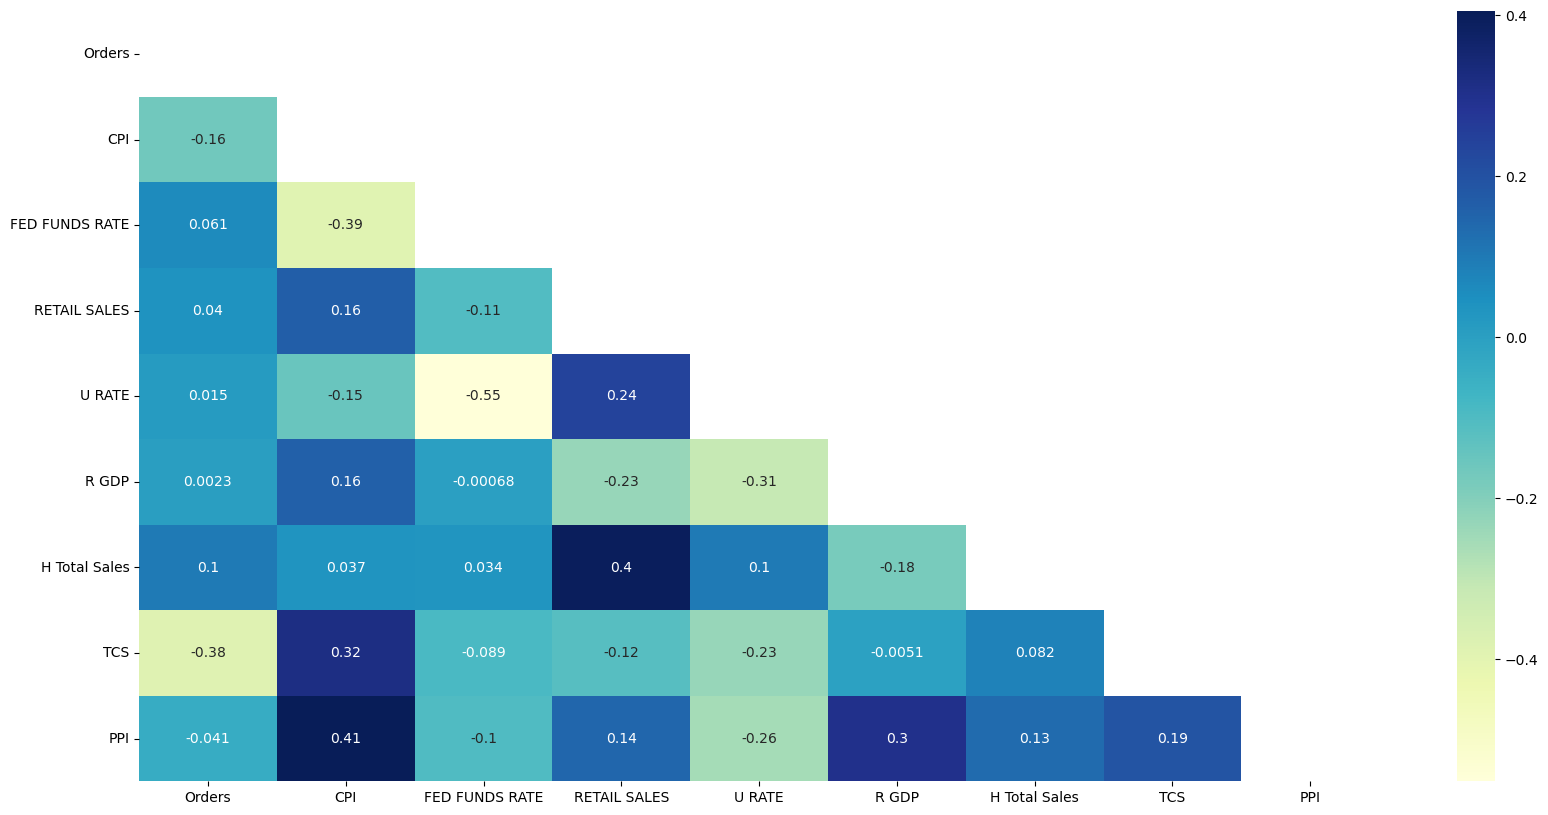

In [45]:
import matplotlib.pyplot as mp
import seaborn as sb
# new_data.iloc[:,0:9].corr().where(np.triu(np.ones(new_data.corr().shape), k=1).astype(bool))
# creating mask
mask = np.triu(np.ones_like(standardized_data.iloc[:,0:11].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(standardized_data.iloc[:,0:11].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
# mp.show()

In [62]:
standardized_data.to_csv('standardized_data.csv', index=False)

#### Detect and replace the outliers form the macro-variables

In [46]:
# transform the data to array form 
RETAIL_SALES_a = macro_var.to_numpy().T[3]
RETAIL_SALES_a

array([-0.9, -0.1, 0.1, 1.4, -0.8, 0.3, 0.5, -1.2, -0.1, 0.5, 0.0, 0.2,
       -1.1, 0.1, 0.7, 0.7, 0.5, 0.6, 0.2, 0.0, 1.2, -1.1, 0.7, -1.7, 3.7,
       -1.4, -22.2, -50.4, 79.2, 39.0, 2.7, 5.1, 1.0, -0.8, -1.7, -0.2,
       13.5, -5.2, 7.2, 0.0, -0.5, -0.6, -0.4, 0.0, 0.8, 0.5, -0.1, -2.7,
       1.1, 2.5, 0.0, 1.5, -1.1, -1.2, 0.1, 0.6, -2.1, 2.0, -1.1, -1.6],
      dtype=object)

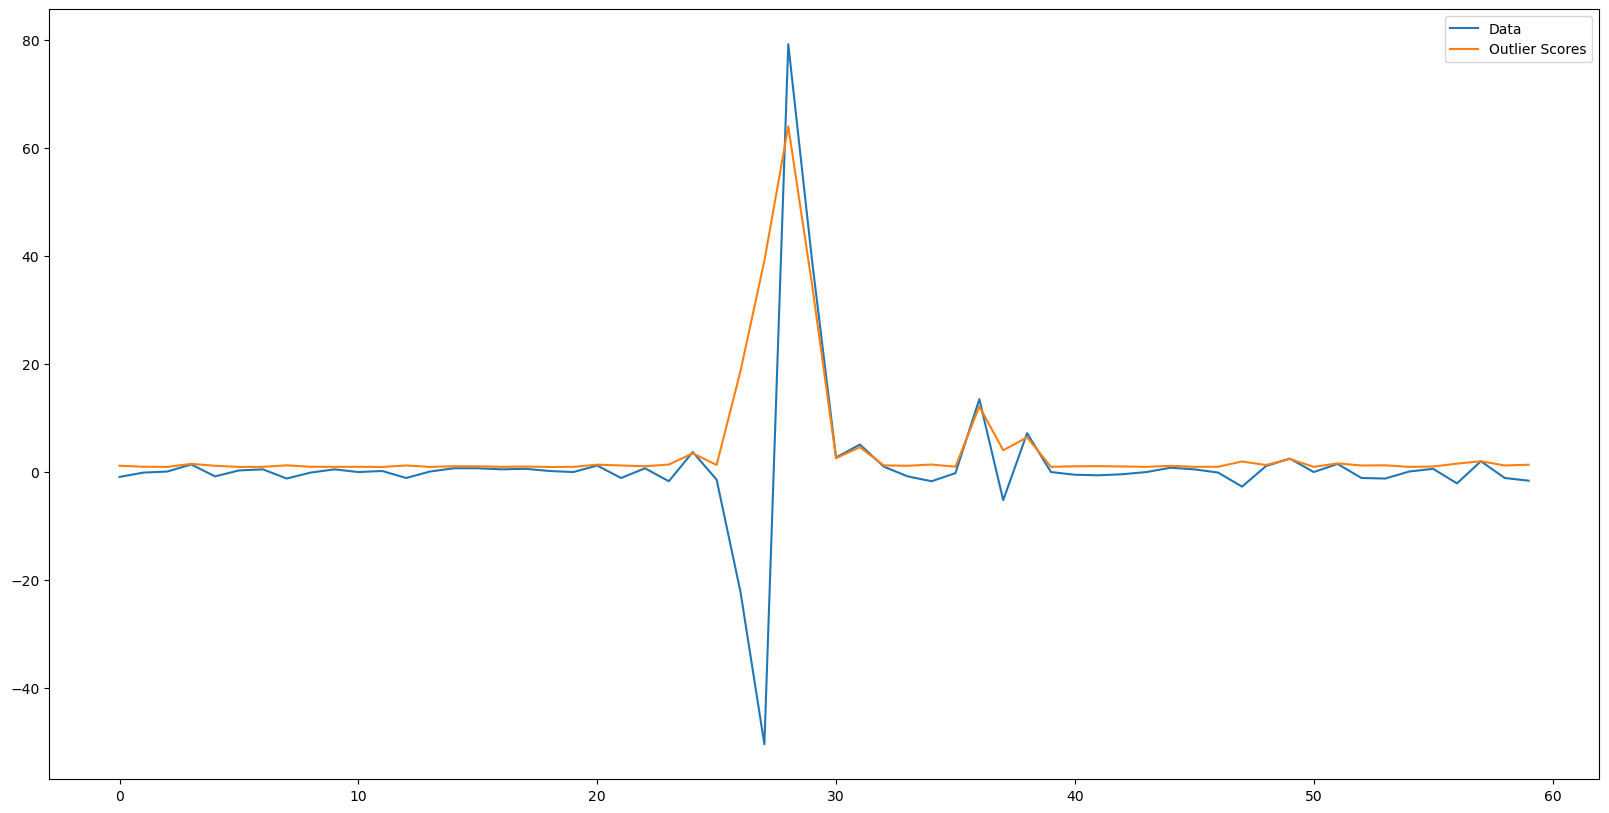

In [47]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(RETAIL_SALES_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(RETAIL_SALES_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(RETAIL_SALES_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

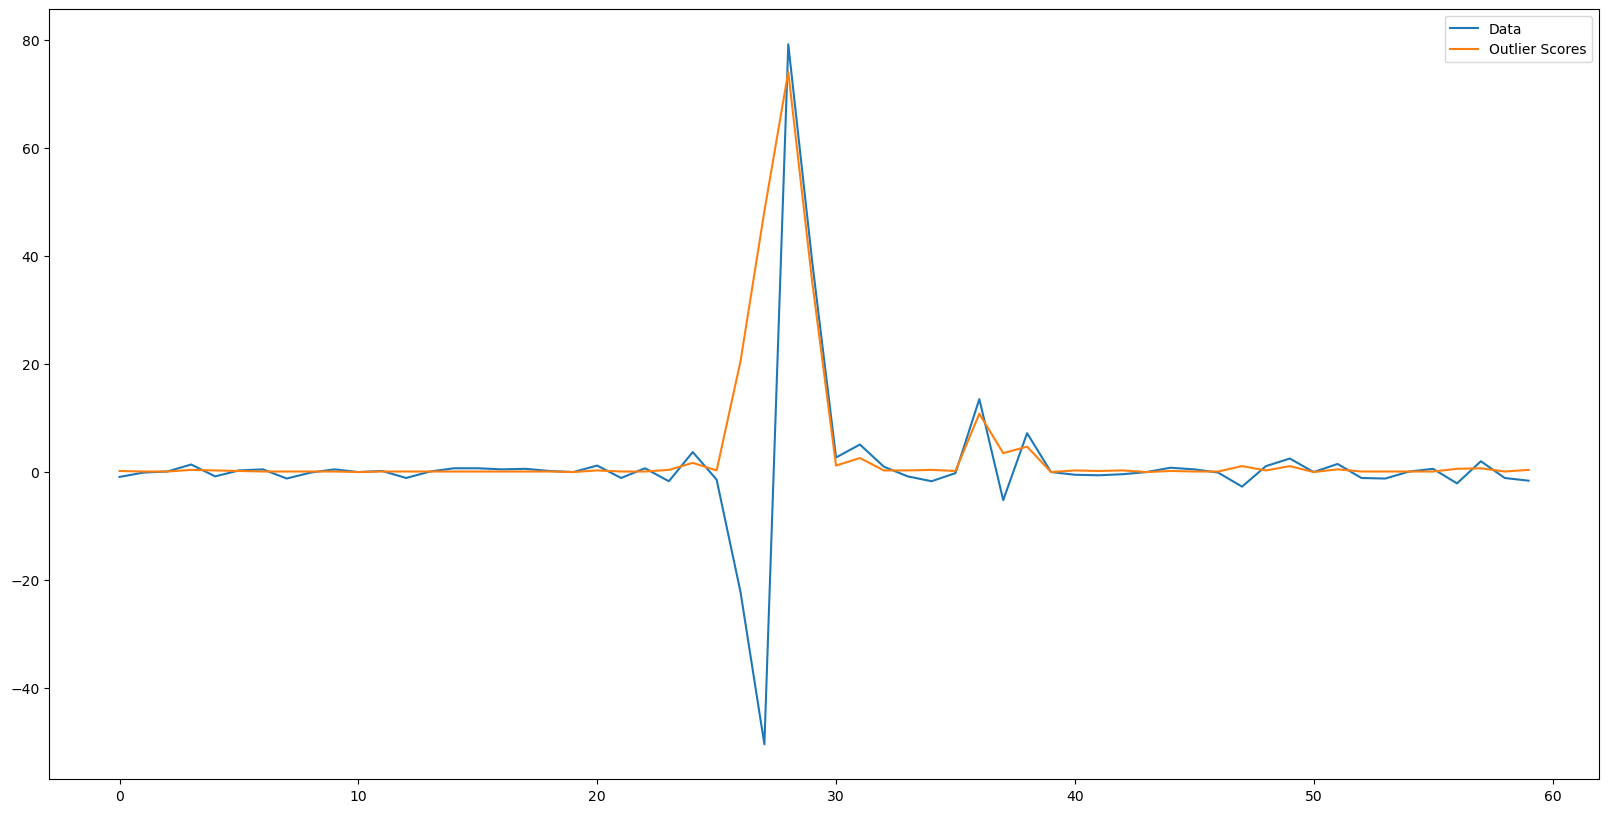

In [48]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(RETAIL_SALES_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(RETAIL_SALES_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(RETAIL_SALES_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [49]:
# transform the data to array form 
U_RATE_a = macro_var.to_numpy().T[4]
U_RATE_a

array([4.0, 4.1, 4.0, 4.0, 3.8, 4.0, 3.8, 3.8, 3.7, 3.8, 3.8, 3.9, 4.0,
       3.8, 3.8, 3.6, 3.7, 3.6, 3.7, 3.7, 3.5, 3.6, 3.6, 3.6, 3.5, 3.5,
       4.4, 14.7, 13.2, 11.0, 10.2, 8.4, 7.9, 6.9, 6.7, 6.7, 6.3, 6.2,
       6.1, 6.1, 5.8, 5.9, 5.4, 5.2, 4.8, 4.5, 4.2, 3.9, 4.0, 3.8, 3.6,
       3.6, 3.6, 3.6, 3.5, 3.7, 3.5, 3.7, 3.6, 3.5], dtype=object)

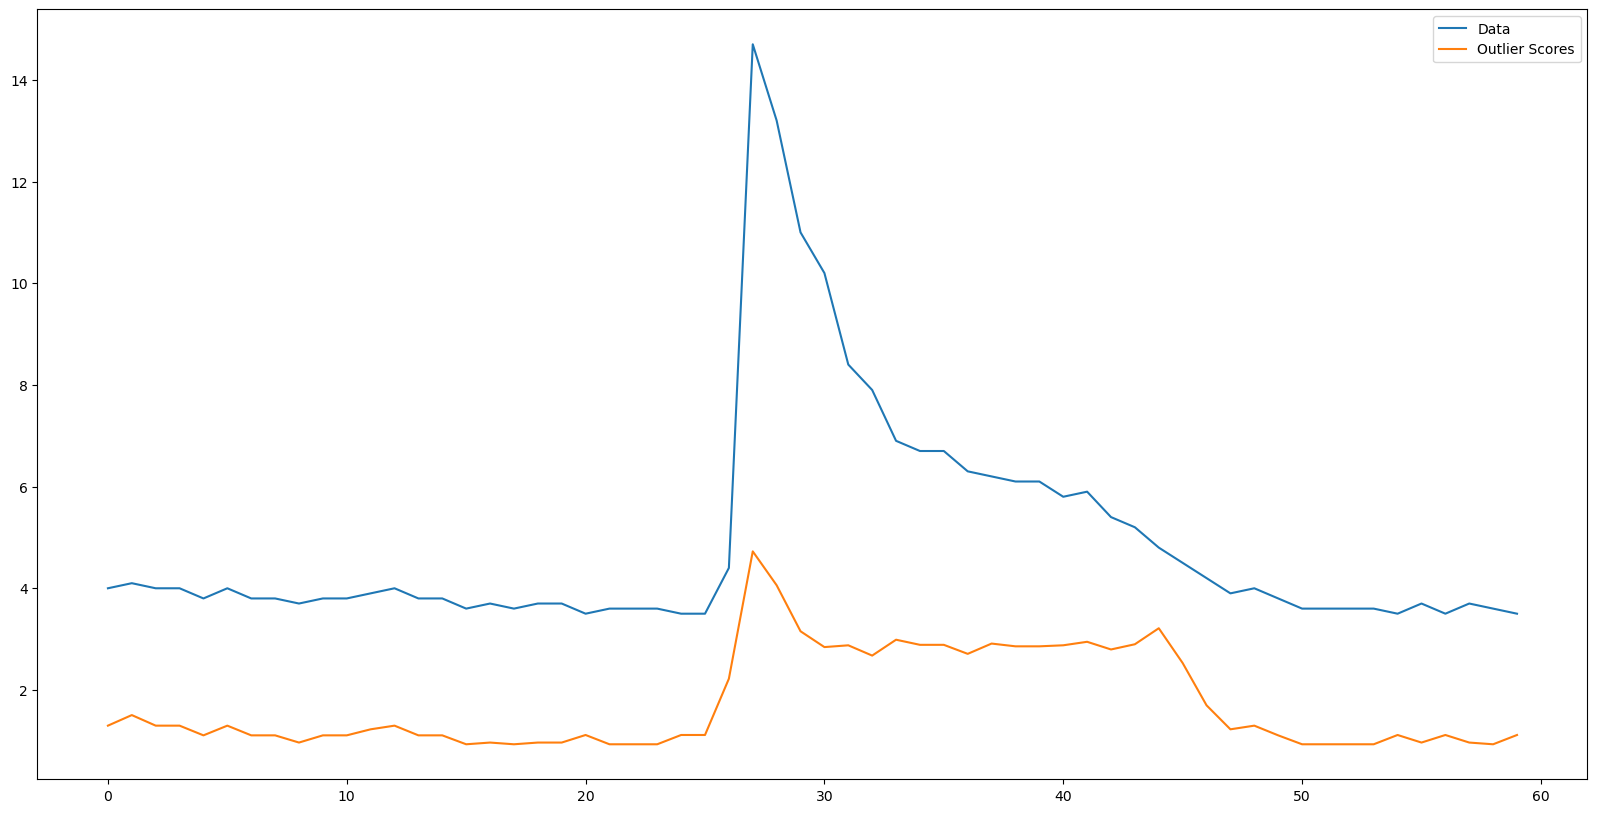

In [50]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(U_RATE_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(U_RATE_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(U_RATE_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

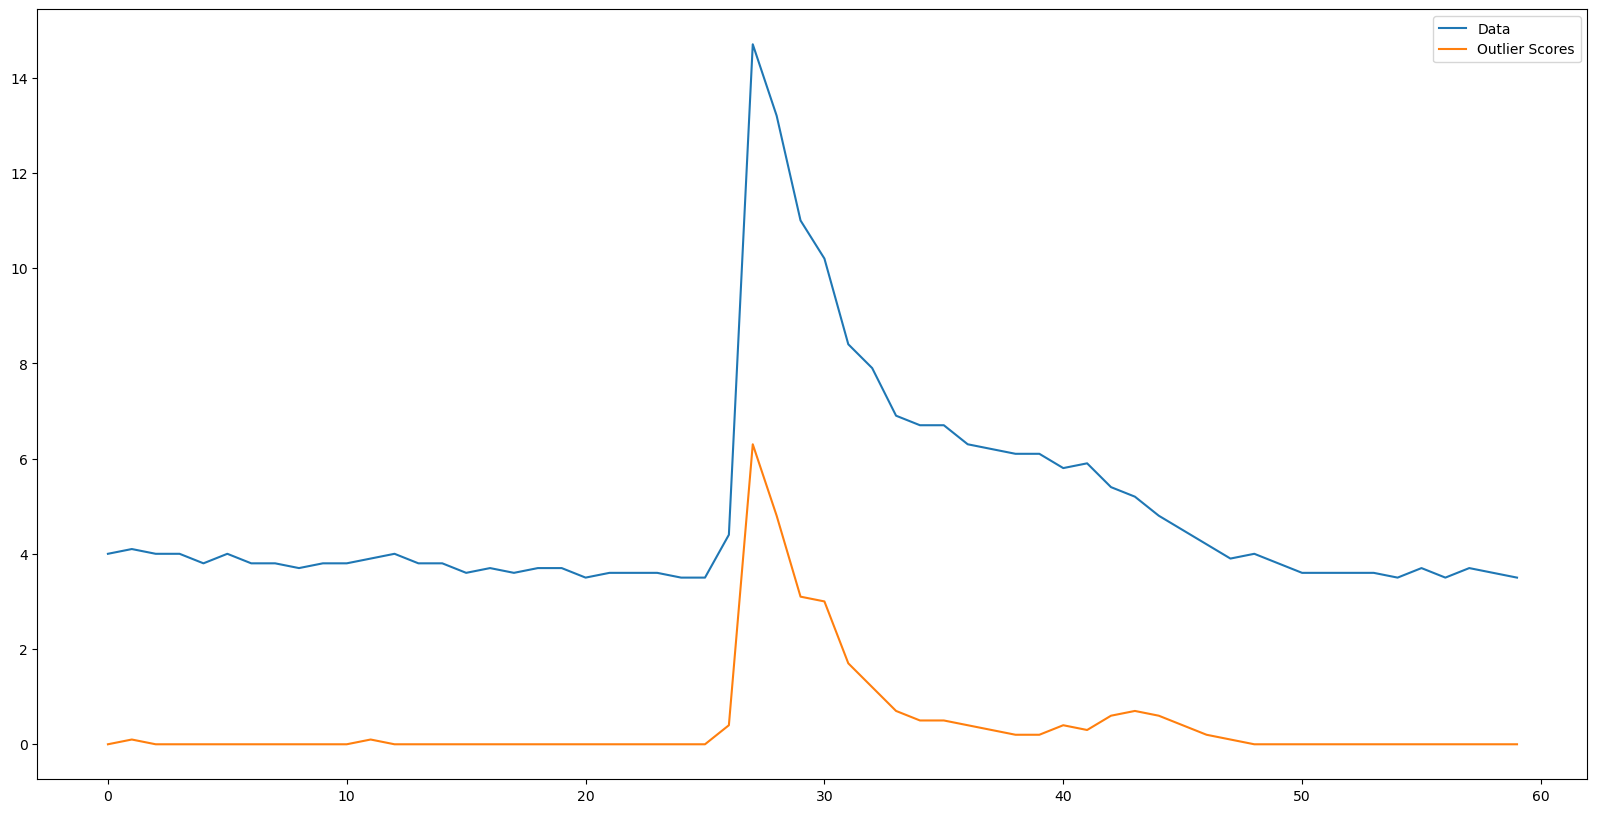

In [51]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(U_RATE_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(U_RATE_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(U_RATE_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [52]:
# transform the data to array form 
R_GDP_a = macro_var.to_numpy().T[5]
R_GDP_a

array([0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.2, 0.2, 0.2, 0.5,
       0.5, 0.5, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.4, 0.4, 0.4, -1.2, -1.2,
       -1.2, -8.5, -8.5, -8.5, 7.9, 7.9, 7.9, 1.0, 1.0, 1.0, 1.5, 1.5,
       1.5, 1.7, 1.7, 1.7, 0.7, 0.7, 0.7, 1.7, 1.7, 1.7, -0.4, -0.4, -0.4,
       -0.1, -0.1, -0.1, 0.8, 0.8, 0.8, 0.7, 0.7, 0.7], dtype=object)

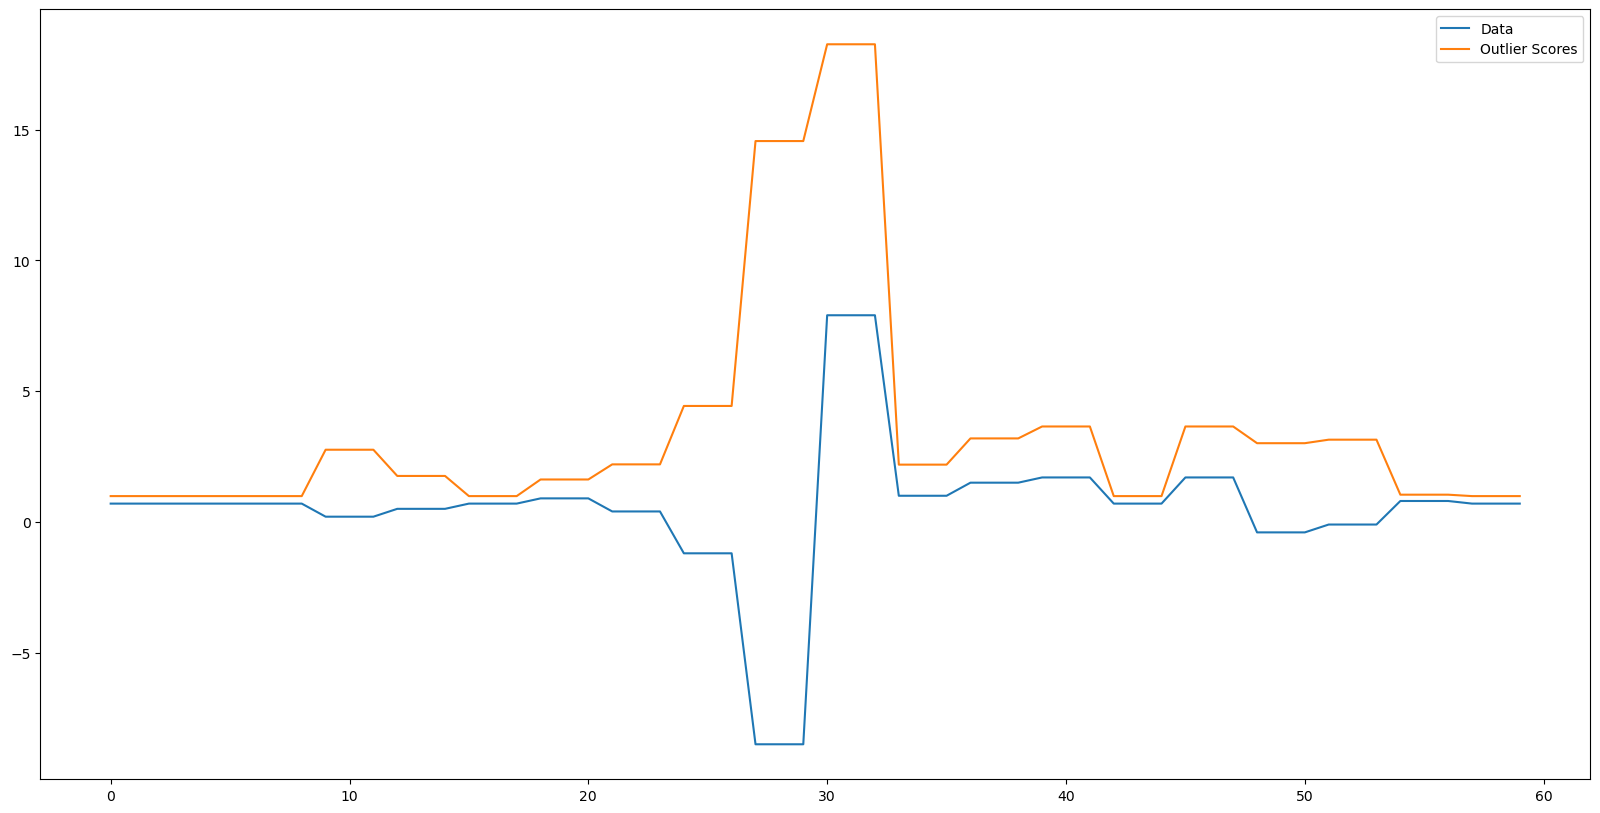

In [53]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(R_GDP_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(R_GDP_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(R_GDP_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

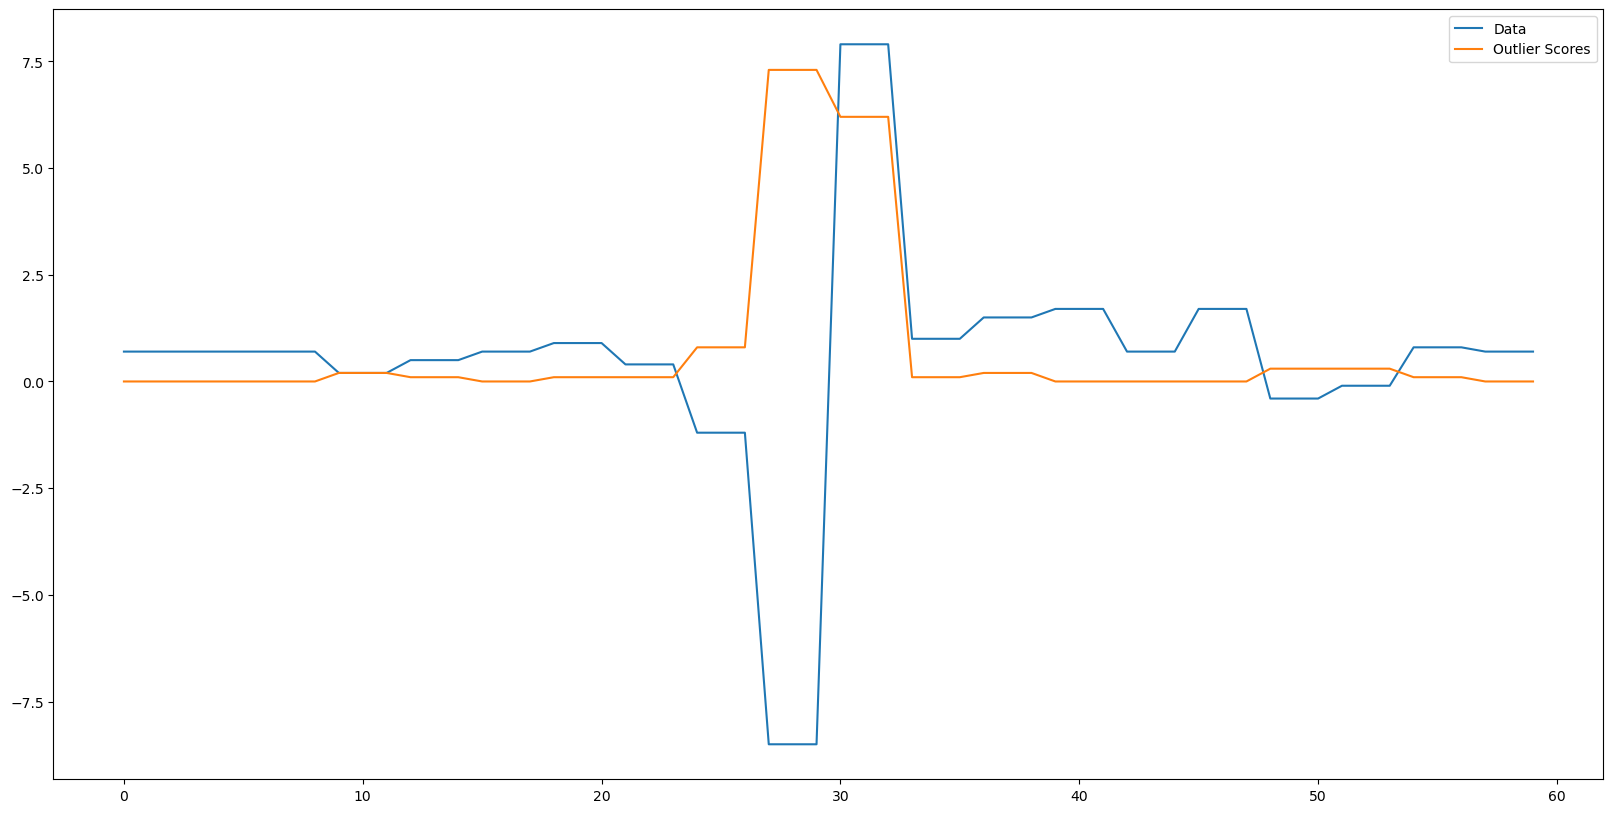

In [54]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(R_GDP_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(R_GDP_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(R_GDP_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

#### Replacing outliers using new csv file

### Re-build the lines chart with 'Orders' 

### Re-calculate the correlation metrics 

### stationary data to standardize transforming

In [55]:
from sklearn.preprocessing import StandardScaler

# Separate the Date column from the dataframe
numeric_cols = combined_data.drop(['Orders', 'Month'], axis=1)

In [56]:
# Standardize the numeric dataframe
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_cols)
# Convert the standardized numpy array back to a dataframe

standardized_data = pd.DataFrame(standardized_data, columns=numeric_cols.columns)
standardized_data['Orders'] = combined_data['Orders']
standardized_data['Month'] = combined_data['Month']
standardized_data = standardized_data[['Month', 'Orders', 'CPI', 'FED FUNDS RATE', 'RETAIL SALES', 'U RATE', 'R GDP',
       'H Total Sales', 'TCS', 'PPI']]
standardized_data.tail()

Month    Orders       CPI  FED FUNDS RATE  RETAIL SALES    U RATE  \
54   8/1/2022  0.716479 -0.875236        1.007406     -0.041257 -0.532897   
55   9/1/2022 -0.466063 -0.219664        1.216660     -0.238028 -0.618103   
56  10/1/2022  0.065729  0.259408        1.689754      0.060773 -0.532897   
57  11/1/2022 -0.071957 -1.026522        2.326611     -0.165150 -0.575500   
58  12/1/2022 -0.425738 -1.556022        2.617746     -0.201589 -0.618103   

       R GDP  H Total Sales       TCS       PPI  
54  0.100667       1.226922  0.931751 -1.614446  
55  0.100667      -1.165176  0.520091  0.002316  
56  0.063777       0.126105 -0.001001 -0.483037  
57  0.063777      -0.415426  0.524308  1.206265  
58  0.063777       0.693462  0.402828 -1.209922

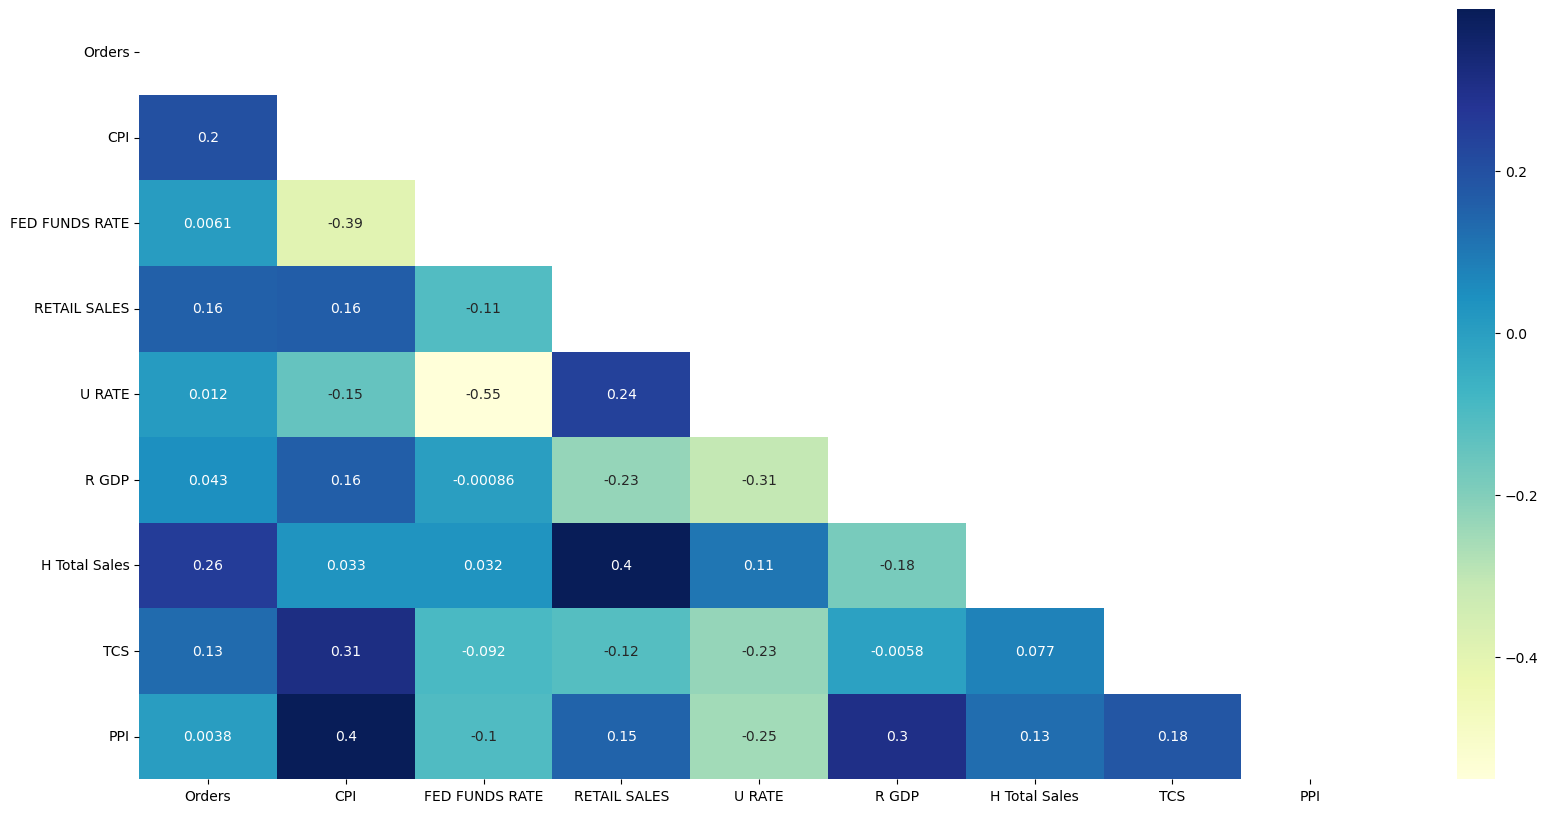

In [57]:
import matplotlib.pyplot as mp
import seaborn as sb
# new_data.iloc[:,0:9].corr().where(np.triu(np.ones(new_data.corr().shape), k=1).astype(bool))
# creating mask
mask = np.triu(np.ones_like(standardized_data.iloc[:,0:11].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(standardized_data.iloc[:,0:11].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
# mp.show()

In [58]:
# fig = px.line(standardized_data, x=standardized_data.Month, y=standardized_data.columns[0:9],
#               labels={"index": "Month"})
# fig.update_layout(title_text="Line Charts of All Variables", title_x = 0.5)
# # fig.add_vline(x=59, line_width=3, line_dash="dash", line_color="grey")
# # Show plot 
# fig.show()

In [59]:
# import matplotlib.pyplot as mp
# import seaborn as sb
# # new_data.iloc[:,0:9].corr().where(np.triu(np.ones(new_data.corr().shape), k=1).astype(bool))
# # creating mask
# mask = np.triu(np.ones_like(standardized_data.iloc[:,0:9].corr()))
 
# # plotting a triangle correlation heatmap
# dataplot = sb.heatmap(standardized_data.iloc[:,0:9].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# # displaying heatmap
# # mp.show()

In [60]:
# standardized_data.to_csv('standardized_data.csv', index=False)